In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# HOME CREDIT INDONESIA SCORECARD MODEL
## Problem Statement:

Home Credit saat ini sedang menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat prediksi skor kredit. Sekarang, kami meminta anda untuk membuka potensi maksimal dari data kami. **Dengan melakukannya, kita dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman datap diberikan dengan principal, maturity, dan repayment calendar yang akan memotivsi pelanggan untuk sukses.** Evaluasi akan dilakukan dengan mengecek seberapa dalam pemahaman analisa yang anda kerjakan. Sebagai catatan, anda perlu menggunakan **setidaknya 2 model Machine Learning dimana salah satunya adalah Logistic Regression**. Setelah itu, buatlah slide presentasi yang mengandung analisa hasil pemodelan secara end-to-end beserta rekomendasi bisnisnya (maksimal 10 halaman)

Point utama:
1. Predict probability variable TARGET (sesuai contoh submission)
2. Pakai 2 model, salah satunya Logistic Regression
3. Cari top 2 insight (relate satu atau lebih variable dengan target atau yang lainnya) dan solusi
4. PPT

## Import Library dan Load Data
Pada tahap ini akan dilakukan import beberapa library Python yang diperlukan serta melakukan pembacaan data.

### Update Library

In [2]:
!pip install --upgrade scikit-learn

### Import Library

In [3]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
from matplotlib_venn import venn2
import seaborn as sns

import gc

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Load Data
Terdapat 9 data yang diberikan dengan data utama berupa data training dan data testing. Untuk sementara, analisis awal hanya akan menggunakan kedua data tersebut untuk membentuk model baseline yang dapat dikembangkan lebih jauh selanjutnya.

Berikut adalah ukuran data training dan data testing.

In [4]:
%%time
train_df = pd.read_csv('/content/gdrive/MyDrive/RAKAMIN/application_train.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/RAKAMIN/application_test.csv')

print(f'Training data shape: {train_df.shape}')
print(f'Testing data shape: {test_df.shape}')

Training data shape: (307511, 122)
Testing data shape: (48744, 121)
CPU times: user 6.28 s, sys: 2.17 s, total: 8.45 s
Wall time: 10.4 s


Data training berjumlah 307511 dengan jumlah features sebanyak 122 sementara data test berjumlah 48733 dengan 121 fitur (tidak ada TARGET pada data test).


In [5]:
# Training dataset
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Testing dataset
test_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Keputusan Awal

Terlihat bahwa pada kedua dataset terdapat kolom gender. Untuk menghindari bias, kolom ini akan dihapus.

In [7]:
train_df = train_df.drop(columns = 'CODE_GENDER')
test_df = test_df.drop(columns = 'CODE_GENDER')

## Exploratory Data Analysis

### Target Distribution (Optional)
Hal pertama yang perlu dilihat adalah distribusi dari kolom target dimana:
* TARGET 0 -> Pinjaman dibayar tepat waktu
* TARGET 1 -> Menandakan bahwa client mengalami kesulitan untuk membayar

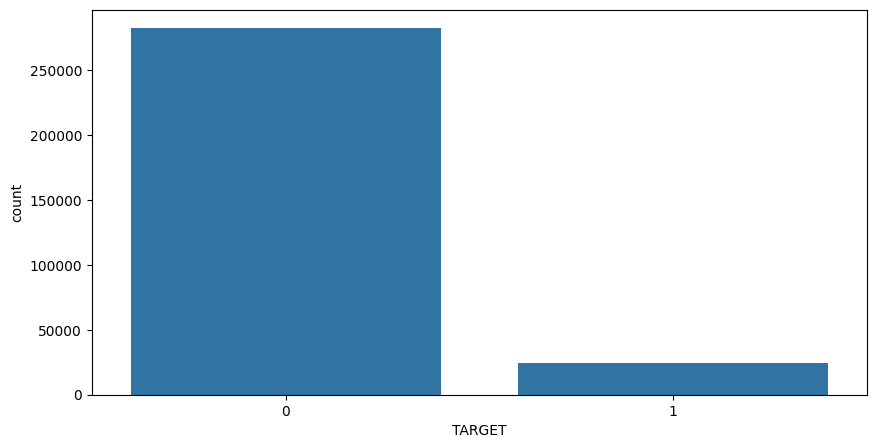

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=train_df['TARGET'])
plt.show()

Data tidak seimbang, lebih banyak TARGET 0 dibanding 1

Selanjutnya, kita lihat apakah data training dan test yang diberikan memiliki observasi yang overlap (terdapat data yang berada di kedua dataset sekaligus) atau tidak

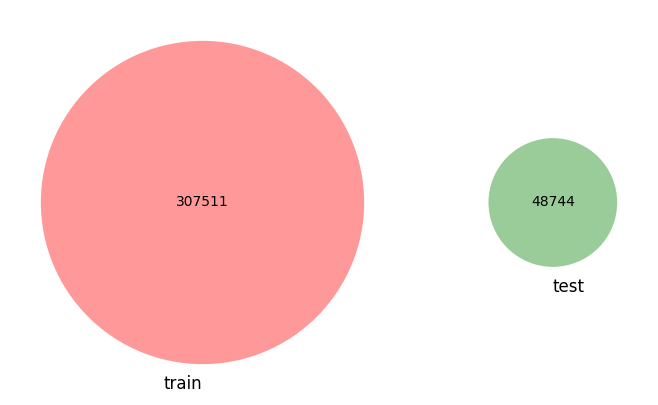

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
set1 = set(train_df.SK_ID_CURR.unique())
set2 = set(test_df.SK_ID_CURR.unique())

venn2([set1, set2], ('train', 'test'))
plt.show()

Terlihat pada gambar di atas bahwa tidak ada data yang overlap

### Menangani Missing Values (Optional)
Selanjutnya adalah terkait penanganan missing values. Optional: Tidak ditangani di sini, hanya melihat adanya missing values

Berikut tampilan beberapa data pertama dari dataset training dan dataset testing.

In [10]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0]
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values('% of Total', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
# Missing values statistics
missing_values = missing_values_table(train_df)
missing_values.head(10)

del missing_values
gc.collect()

Your selected dataframe has 121 columns.
There are 67 columns that have missing values.


137

Terlihat bahwa terdapat 67 kolom pada data training. Keberadaan missing value tersebut akan mempengaruhi model yang akan dibangun nantinya. Terdapat beberapa cara yang dapat digunakan untuk mengataasi hal tersebut seperti mengisi data yang kosong tersebut atau pun menghapus kolom yang memiliki persentasi missing value yang besar. Namun, karena saat ini belum diketahui apakah kolom-kolom tersebut memiliki peran dalam memprediksi target, untuk saat ini data tidak akan diubah terlebih dahulu.

### Tipe Kolom (Optional)
Berikut adalah tipe kolom pada dataset training. Optional: Hanya sebagai insight dan tidak berpengaruh ke step selanjutnya.

In [12]:
train_df.dtypes.value_counts()

float64    65
int64      41
object     15
dtype: int64

In [13]:
train_df.dtypes.head(10)

SK_ID_CURR              int64
TARGET                  int64
NAME_CONTRACT_TYPE     object
FLAG_OWN_CAR           object
FLAG_OWN_REALTY        object
CNT_CHILDREN            int64
AMT_INCOME_TOTAL      float64
AMT_CREDIT            float64
AMT_ANNUITY           float64
AMT_GOODS_PRICE       float64
dtype: object

Terdapat 65 kolom dengan tipe data `float64` dan 41 kolom dengantipe data `int64` yang keduanya merupakan data numerik. Lalu, terdapat juga 16 kolom dengan tipe `object` yang berisikan string dan merupakan data categorical seperti kode gender/jenis kelamin, nama kontrak, dsb.

Berikut adalah jumlah dari kategori pada masing-masing kolom yang bersifat categorical.

In [14]:
train_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [15]:
train_df.select_dtypes('object').apply(lambda x: x.unique(), axis=0).head(5)

NAME_CONTRACT_TYPE                        [Cash loans, Revolving loans]
FLAG_OWN_CAR                                                     [N, Y]
FLAG_OWN_REALTY                                                  [Y, N]
NAME_TYPE_SUITE       [Unaccompanied, Family, Spouse, partner, Child...
NAME_INCOME_TYPE      [Working, State servant, Commercial associate,...
dtype: object

### Encoding
Salah satu model yang diminta untuk dibuat pada problem statement adalah **logistic regression**. Model tersebut tidak bisa menangani variabel yang bersifat categorical. Oleh karena itu, diperlukan proses encoding pada variabel-variabel tersebut sehingga dapat direpresentasikan dengan angka.

Pada proses ini, data kategorikal yang hanya memiliki 2 unique values (atau kurang) akan melalui proses label encoding (menggunakan `LabelEncoder` dari Scikit-learn) sedangkan yang lainnya akan melalui proses one-hot encoding (menggunakan metode `get_dummies(df)` dari pandas).

In [16]:
from sklearn import preprocessing

In [17]:
# instansiasi objek label encoder
lab_en = preprocessing.LabelEncoder()
lab_en_count = 0

for col in train_df:
  if train_df[col].dtype == 'object':
    # If 2 or fewer unique categories
    if len(list(train_df[col].unique())) <= 2:
      print(f'label encoding: {col}')
      # Train on the training data
      lab_en.fit(train_df[col])
      # Transform
      train_df[col] = lab_en.transform(train_df[col])
      test_df[col] = lab_en.transform(test_df[col])

      lab_en_count += 1

print('%d columns were label encoded.' % lab_en_count)

label encoding: NAME_CONTRACT_TYPE
label encoding: FLAG_OWN_CAR
label encoding: FLAG_OWN_REALTY
3 columns were label encoded.


In [18]:
# one-hot encoding pada kolom categorical lainnya
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

print('Training shape: ', train_df.shape)
print('Testing shape: ', test_df.shape)

Training shape:  (307511, 240)
Testing shape:  (48744, 237)


Terlihat bahwa pada setelah proses di atas, ukuran data training dan data testing berubah. Hal tersebut diakibatkan oleh proses one-hot encoding yang menghasilkan kolom-kolom baru. Terdapat ketidaksesuaian antara kolom yang dihasilkan pada data training dan data testing dimana seharusnya data training hanya memiliki tambahan satu kolom saja (kolom TARGET). Perlu dilakukan alignment antara data testing dan data training.

In [19]:
# Simpan kolom TARGET dari data training terlebih dahulu
train_labels = train_df['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
train_df, test_df = train_df.align(test_df, join = 'inner', axis = 1)
print('Training shape before: ', train_df.shape)
print('Testing shape before: ', test_df.shape)

# Kembalikan kolom target pada data training
train_df['TARGET'] = train_labels

print('Training shape after: ', train_df.shape)
print('Testing shape after: ', test_df.shape)

Training shape before:  (307511, 237)
Testing shape before:  (48744, 237)
Training shape after:  (307511, 238)
Testing shape after:  (48744, 237)


### Outlier

Pertama, kita lihat nilai variance dari masing-masing kolom

In [20]:
from tqdm import tqdm # feedback

In [21]:
train_df.var().sort_values().tail(20)

REGION_RATING_CLIENT          2.591155e-01
CNT_CHILDREN                  5.214593e-01
AMT_REQ_CREDIT_BUREAU_QRT     6.305244e-01
CNT_FAM_MEMBERS               8.293409e-01
AMT_REQ_CREDIT_BUREAU_MON     8.390604e-01
AMT_REQ_CREDIT_BUREAU_YEAR    3.494264e+00
OBS_60_CNT_SOCIAL_CIRCLE      5.663464e+00
OBS_30_CNT_SOCIAL_CIRCLE      5.764747e+00
HOUR_APPR_PROCESS_START       1.066566e+01
OWN_CAR_AGE                   1.426785e+02
DAYS_LAST_PHONE_CHANGE        6.836123e+05
DAYS_ID_PUBLISH               2.278441e+06
DAYS_REGISTRATION             1.241073e+07
DAYS_BIRTH                    1.904440e+07
AMT_ANNUITY                   2.100684e+08
SK_ID_CURR                    1.056582e+10
DAYS_EMPLOYED                 1.995884e+10
AMT_INCOME_TOTAL              5.622739e+10
AMT_GOODS_PRICE               1.364907e+11
AMT_CREDIT                    1.619988e+11
dtype: float64

Terlihat bahwa terdapat beberapa kolom dengan nilai variance yang sangat tinggi.

  0%|          | 0/10 [00:00<?, ?it/s]

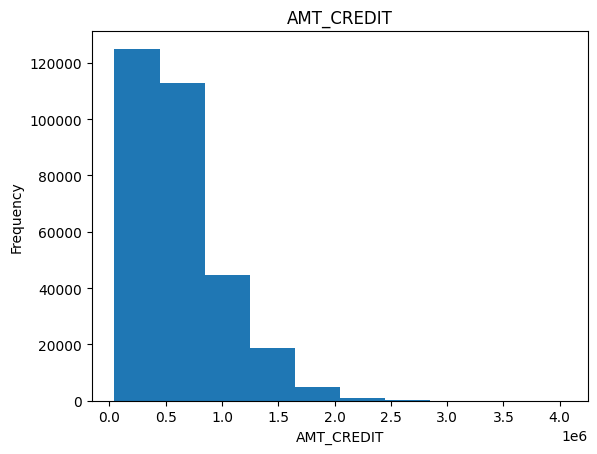

 10%|█         | 1/10 [00:00<00:07,  1.19it/s]

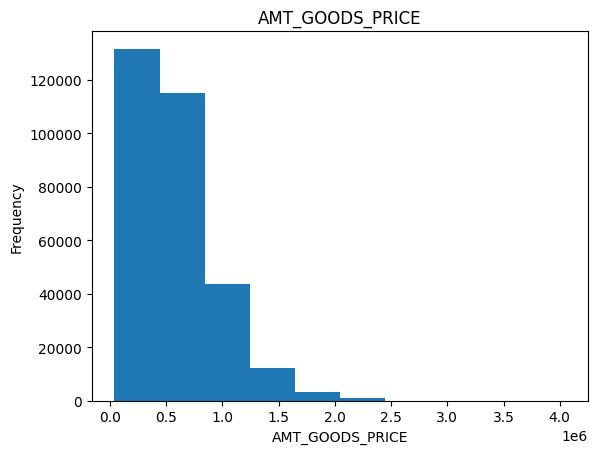

 20%|██        | 2/10 [00:01<00:05,  1.47it/s]

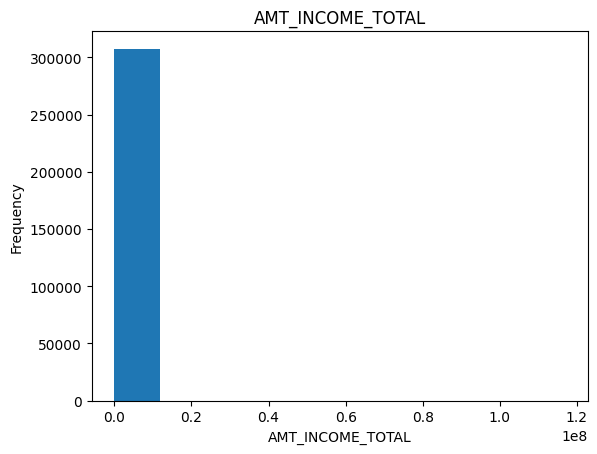

 30%|███       | 3/10 [00:02<00:04,  1.53it/s]

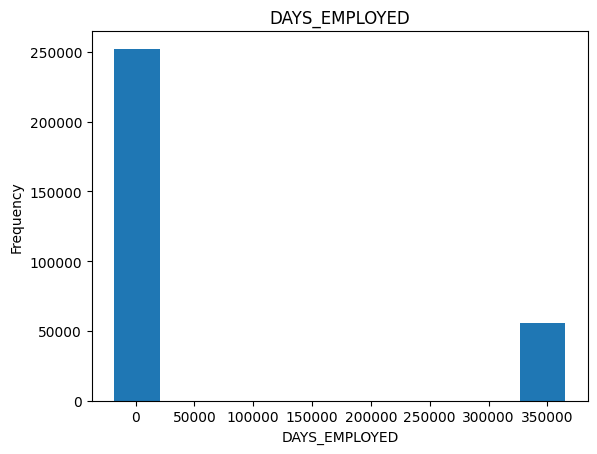

 40%|████      | 4/10 [00:02<00:03,  1.51it/s]

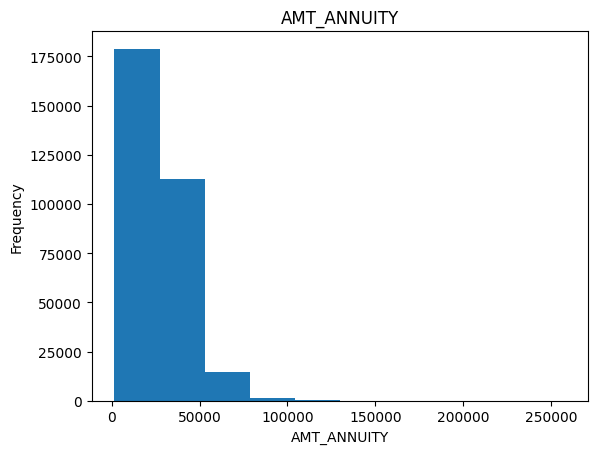

 50%|█████     | 5/10 [00:03<00:04,  1.24it/s]

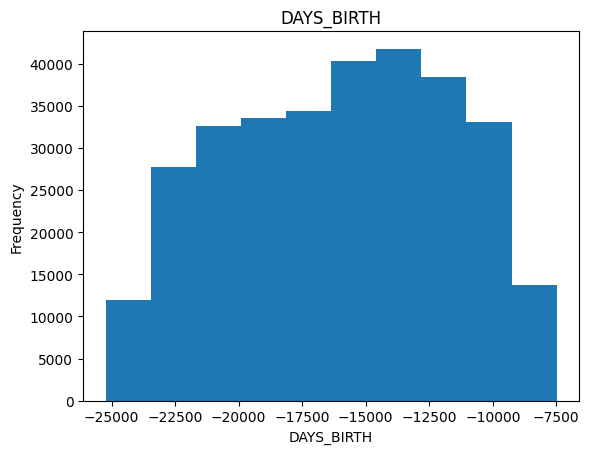

 60%|██████    | 6/10 [00:05<00:03,  1.04it/s]

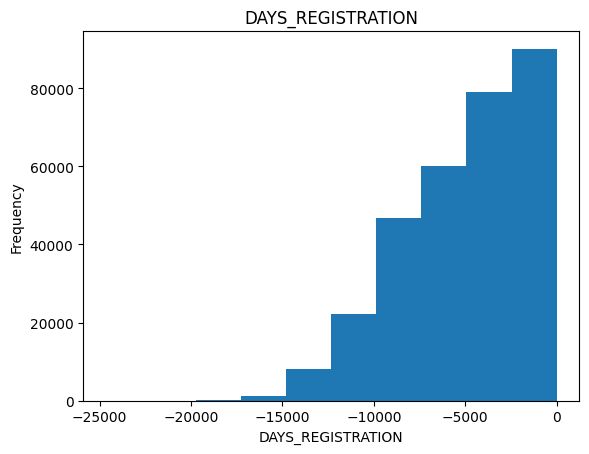

 70%|███████   | 7/10 [00:06<00:03,  1.03s/it]

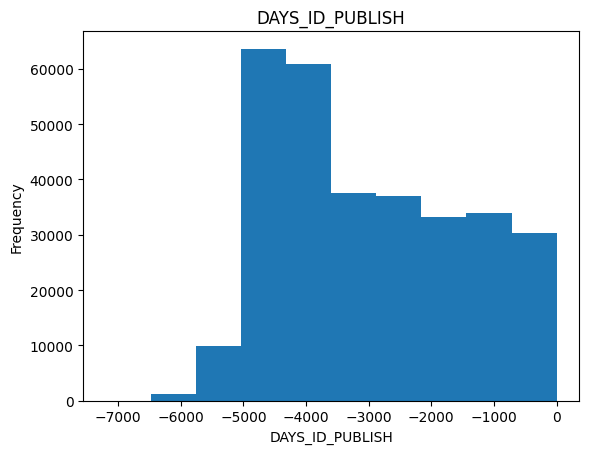

 80%|████████  | 8/10 [00:07<00:01,  1.04it/s]

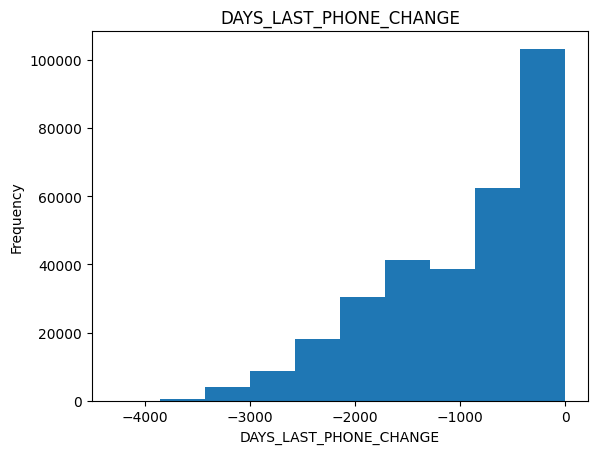

 90%|█████████ | 9/10 [00:07<00:00,  1.21it/s]

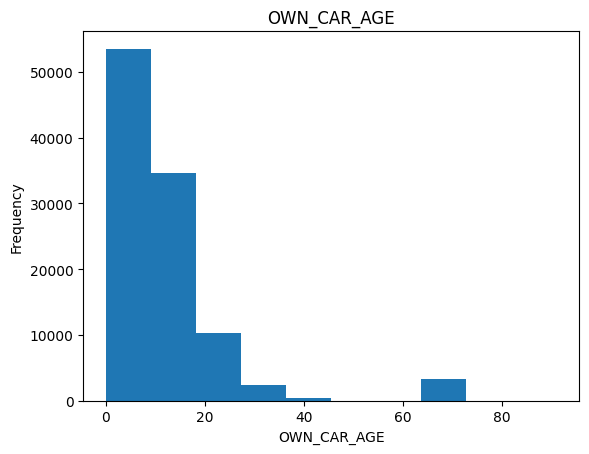

100%|██████████| 10/10 [00:07<00:00,  1.25it/s]


30091

In [22]:
# Ambil 10 kolom dengan variance tertinggi
highest_var_cols = ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'AMT_ANNUITY',
                   'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'OWN_CAR_AGE']

# Plot pie charts for integer columns and distribution plots for float columns
for col in tqdm(highest_var_cols):
  train_df[col].plot.hist(title = col)
  plt.xlabel(col)
  plt.show()
del highest_var_cols
gc.collect()

Dapat dilihat bahwa data-data berikut memiliki nilai variance yang besar. Terlihat juga bahwa pada plot distribusi data terdapat ketimpangan. Selanjutnya, akan kita cek kolom DAYS_EMPLOYED.

In [23]:
(train_df['DAYS_EMPLOYED']).describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

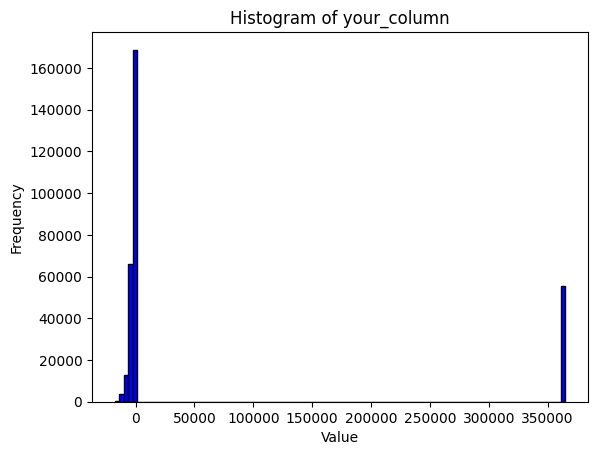

In [24]:
# Plot a histogram of the 'your_column' data
plt.hist(train_df['DAYS_EMPLOYED'], bins=100, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of your_column')

# Show the plot
plt.show()

Terlihat bahwa persebaran data tersebut tidak masuk akal. Data atau kolom tersebut menunjukan jumlah total hari kerja dari seorang client dan nilai terbesarnya mencapai 365243 hari (setara kurang lebih 1000 tahun). Selain itu, perhitungan DAYS_EMPLOYED seharusnya bernilai negatif. Kita lihat apakah ada data di antara value 5000 sampai 350000.

In [25]:
# Use boolean indexing to filter values within the specified range
filtered_values = train_df['DAYS_EMPLOYED'][(train_df['DAYS_EMPLOYED'] >= 5000) & (train_df['DAYS_EMPLOYED'] <= 350000)]

# Get the count of values within the specified range
len(filtered_values)

0

Sudah dipastikan bahwa tidak ada data DAYS_EMPLOYED lainnya di antara nilai 5000 - 350000. Karena sudah terlihat bahwa data outlier seluruhnya bernilai 365243, kita hanya perlu mengganti data dengan value tersebut dengan missing value untuk nanti dihandle menggunakan imputer

Text(0.5, 0, 'Days Employment')

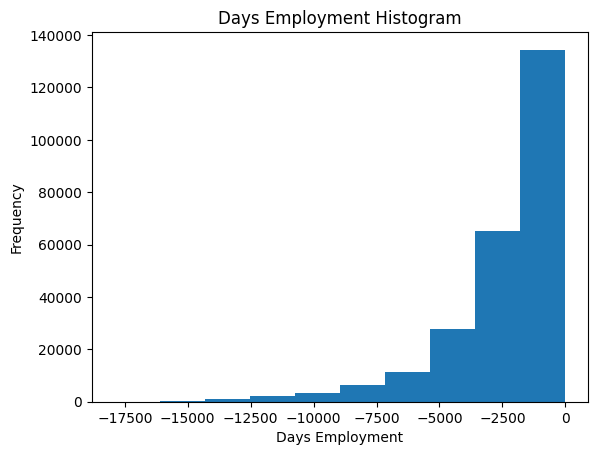

In [26]:
# Replace the anomalous values with nan
train_df["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

train_df["DAYS_EMPLOYED"].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

Hal yang sama diperlukan juga untuk dilakukan pada dataset testing

In [27]:
(test_df['DAYS_EMPLOYED']).describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [28]:
# Replace the anomalous values with nan
test_df["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

### Correlation (Optional)
Penghitungan korelasi antara fitur lain dengan target. Optional: Hanya untuk mencari insight. Run ketika ada perubahan dari dataset saja karena hasilnya tidak berubah jika dataset tidak berubah dan juga tidak berpengaruh ke step selanjutnya.

In [29]:
# Find correlations with the target and sort
correlations = train_df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(20))
print('\nMost Negative Correlations:\n', correlations.head(20))

Most Positive Correlations:
 OCCUPATION_TYPE_Drivers                              0.030303
DEF_60_CNT_SOCIAL_CIRCLE                             0.031276
DEF_30_CNT_SOCIAL_CIRCLE                             0.032248
LIVE_CITY_NOT_WORK_CITY                              0.032518
OWN_CAR_AGE                                          0.037612
DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                     

In [30]:
print('Columns with highest correlation (absolute):\n', abs(correlations).sort_values(ascending=False).head(20))
del correlations
gc.collect()

Columns with highest correlation (absolute):
 TARGET                                               1.000000
EXT_SOURCE_3                                         0.178919
EXT_SOURCE_2                                         0.160472
EXT_SOURCE_1                                         0.155317
DAYS_BIRTH                                           0.078239
DAYS_EMPLOYED                                        0.074958
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
NAME_EDUCATION_TYPE_Higher education                 0.056593
DAYS_LAST_PHONE_CHANGE                               0.055218
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
NAME_INCOME_TYPE_Pensioner                           0.046209
ORGANIZATION_TYPE_XNA   

9528

**Perlu diperhatikan** bahwa beberapa kolom memiliki nilai negatif seperti kolom DAYS_BIRTH dan DAYS_EMPLOYED. Hal tersebut menandakan bahwa korelasi sebenarnya dari DAYS_BIRTH terbalik atau negatif. Terlihat bahwa secara magnitude, dapat diurutkan kolom dengan korelasi terbesar dengan target yaitu kolom:

1. EXT_SOURCE_3
2. EXT_SOURCE_2
3. EXT_SOURCE_1
4. DAYS_BIRTH
5. DAYS_EMPLOYED
6. REGION_RATING_CLIENT_W_CITY
7. REGION_RATING_CLIENT
8.  NAME_INCOME_TYPE
9.   NAME_EDUCATION_TYPE

Beberapa insight:
1. Seseorang dengan EXT_SOURCE (diasumsikan external source income atau pendapatan eksternal) memiliki kecenderungan yang cukup besar untuk membayar
2. Seseorang yang telah pensiun cenderung untuk membayar, begitu juga dengan usia yang lebih tua
3. Pendidikan cukup memiliki korelasi yang besar dimana seseorang dengan status  pendidikan Higher education cenderung untuk membayar sedangkan seseorang dengan status pendidikan Secondary / secondary special cenderung untuk sebaliknya
4.

### Pengecekan ulang outlier pada kolom dengan korelasi yang tinggi (Optional)

Selanjutnya akan dilakukan pengecekan ulang terhadap kolom-kolom tersebut untuk memastikan bahwa tidak ada outlier atau anomali pada data tersebut

  0%|          | 0/9 [00:00<?, ?it/s]

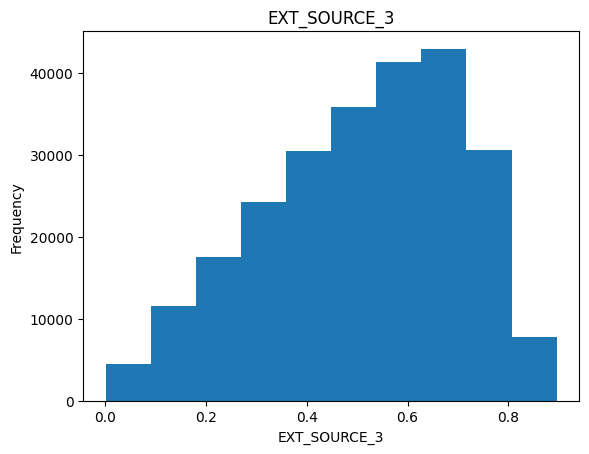

 11%|█         | 1/9 [00:00<00:01,  4.10it/s]

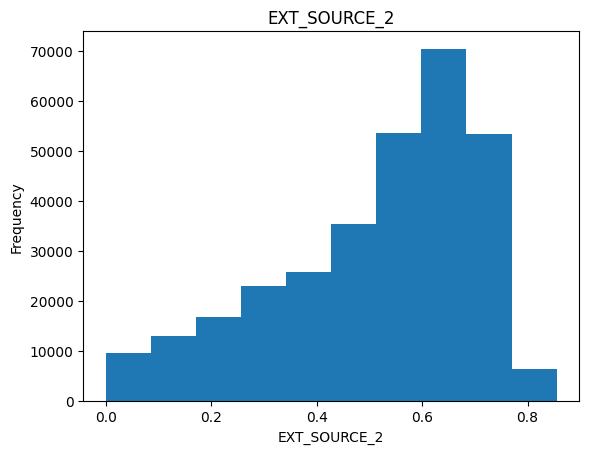

 22%|██▏       | 2/9 [00:00<00:01,  3.85it/s]

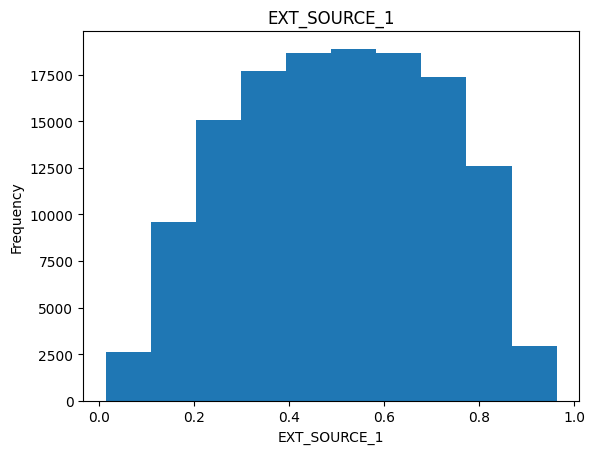

 33%|███▎      | 3/9 [00:00<00:01,  3.73it/s]

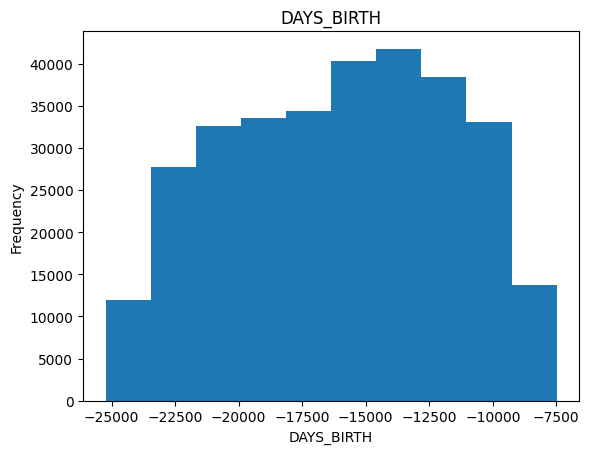

 44%|████▍     | 4/9 [00:01<00:01,  3.57it/s]

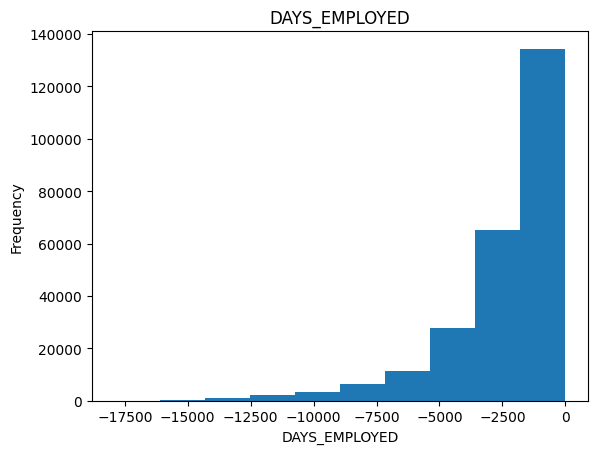

 56%|█████▌    | 5/9 [00:01<00:01,  3.55it/s]

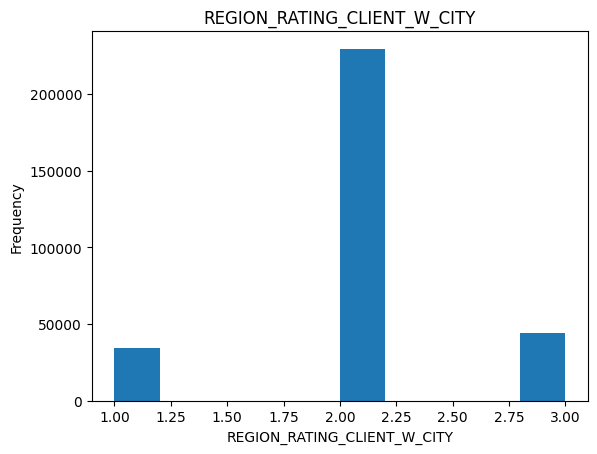

 67%|██████▋   | 6/9 [00:01<00:00,  3.54it/s]

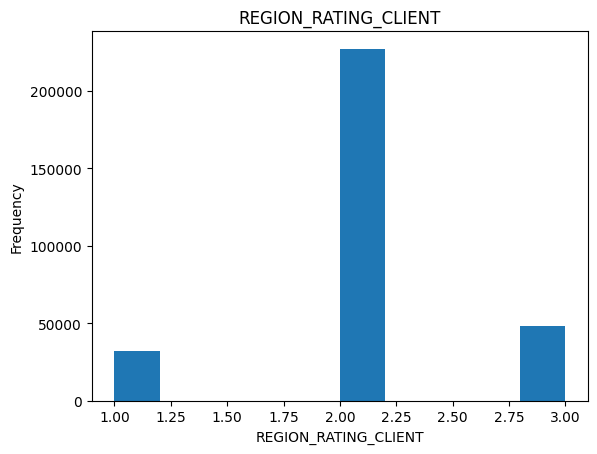

 78%|███████▊  | 7/9 [00:02<00:00,  3.21it/s]

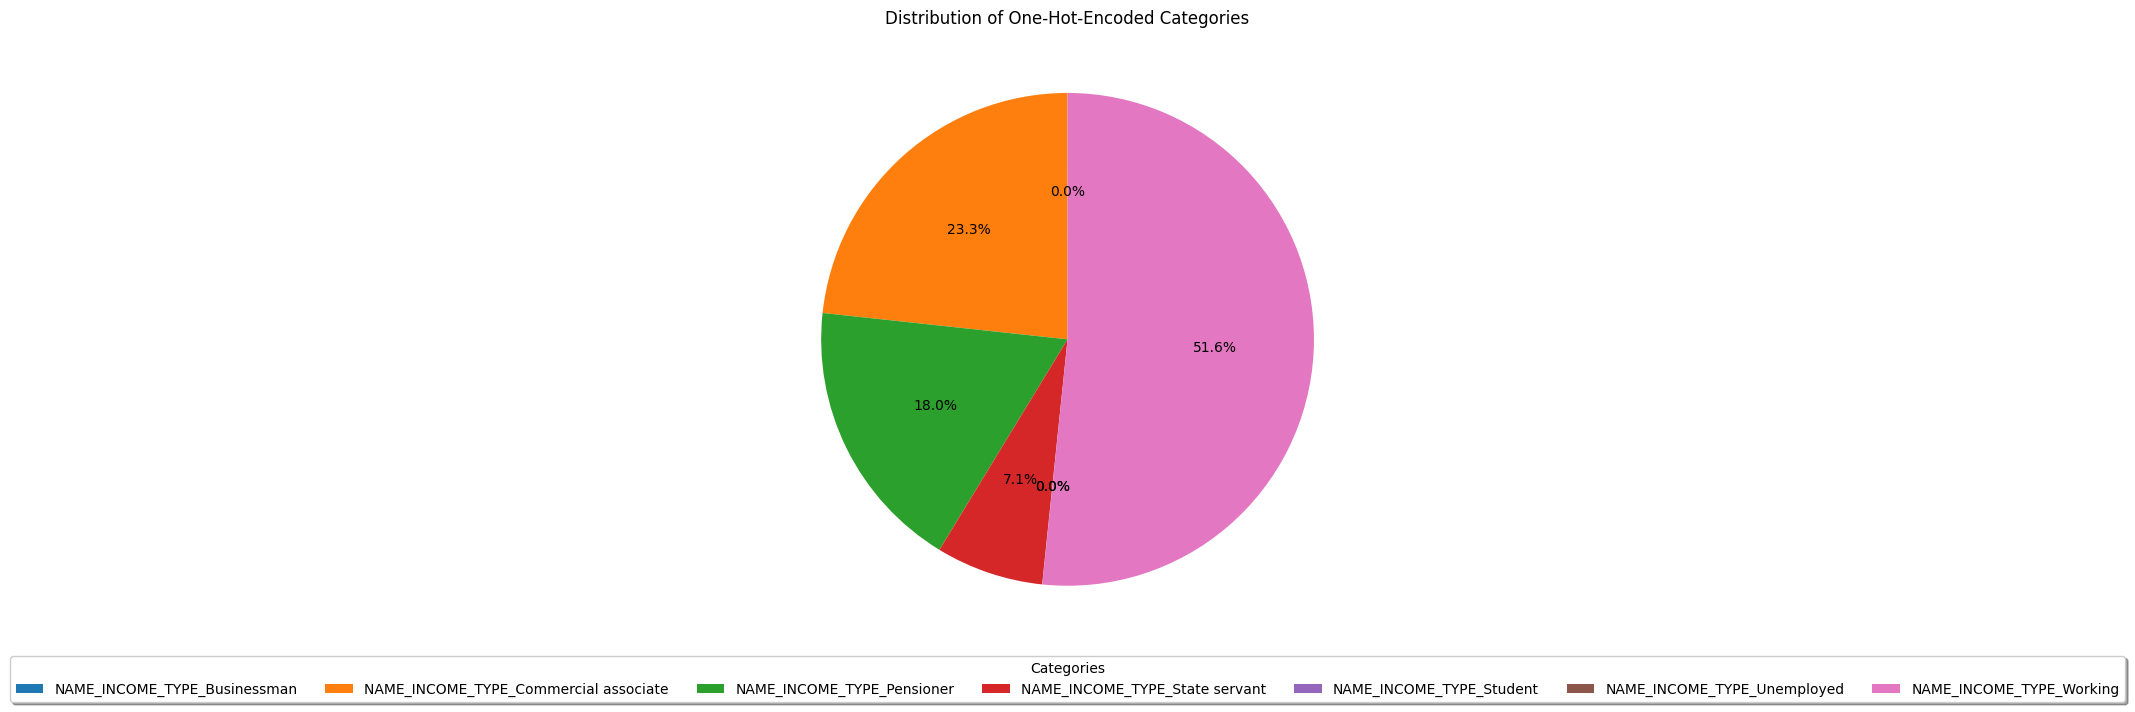

 89%|████████▉ | 8/9 [00:02<00:00,  2.27it/s]

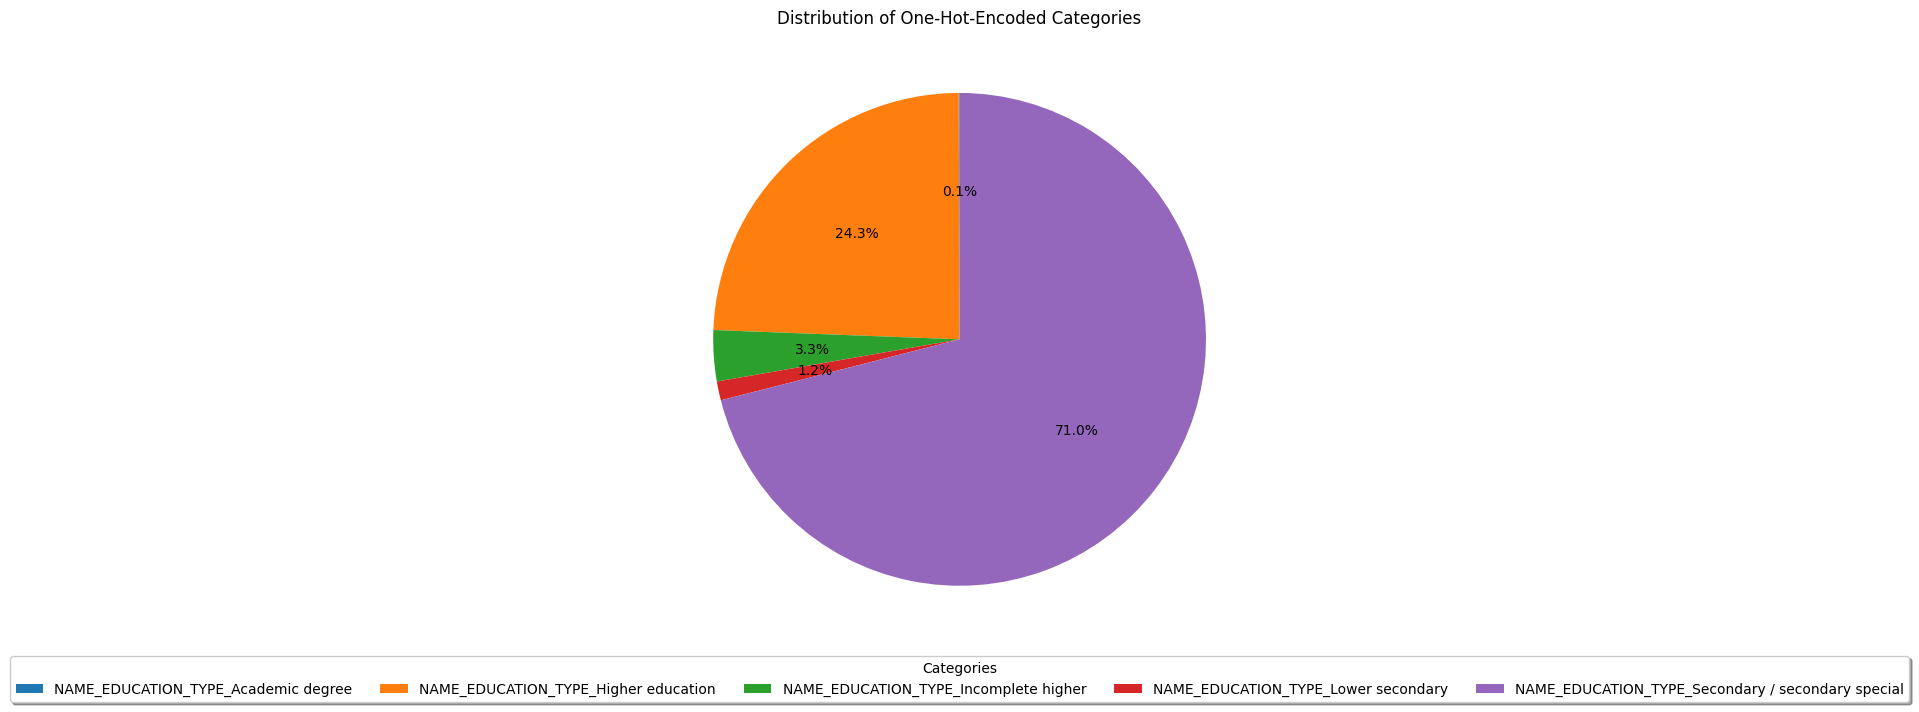

100%|██████████| 9/9 [00:03<00:00,  2.83it/s]


In [31]:
def draw_categorical_pie(cols):
    # Identify one-hot-encoded columns that start with 'Category'
    one_hot_columns = [col for col in train_df.columns if col.startswith(cols)]

    # Create a new DataFrame containing only the one-hot-encoded columns
    one_hot_df = train_df[one_hot_columns]

    # Calculate the sum of each one-hot-encoded column
    category_counts = one_hot_df.sum()

    # Plot a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(category_counts, labels=None, autopct='%1.1f%%', startangle=90)
    plt.title('Distribution of One-Hot-Encoded Categories')

    # Display labels at the bottom using legend
    plt.legend(category_counts.index, title="Categories", loc="lower center", bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=len(category_counts))

    plt.show()

columns = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1',
            'DAYS_BIRTH', 'DAYS_EMPLOYED',
            'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
            'NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE']

for cols in tqdm(columns):
    if cols == 'NAME_INCOME_TYPE':
        draw_categorical_pie(cols)
    elif cols == 'NAME_EDUCATION_TYPE':
        draw_categorical_pie(cols)
    else:
        train_df[cols].plot.hist(title = cols)
        plt.xlabel(cols)
        plt.show()

Distribusi data terlihat normal. Beberapa insight yang didapat:
1. Urutan jumlah client berdasarkan income type: Working, commercial_associate, Pensioner, state_servant, diikuti yang lainnya
3. Urutan jumlah client berdasarkan status pendidikan: Secondary/secondary special, Higher education, Incomplete higher, Lower secondary, dan terakhir Academic degree

In [32]:
numeric_cols = columns = ['EXT_SOURCE_3',
'EXT_SOURCE_2',
'EXT_SOURCE_1',
'DAYS_BIRTH',
'DAYS_EMPLOYED',
'REGION_RATING_CLIENT_W_CITY',
'REGION_RATING_CLIENT']
missing_values = missing_values_table(train_df[numeric_cols])
missing_values

Your selected dataframe has 7 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total
EXT_SOURCE_1,173378,56.4
EXT_SOURCE_3,60965,19.8
DAYS_EMPLOYED,55374,18.0
EXT_SOURCE_2,660,0.2


Kolom EXT_SOURCE_1 memiliki banyak missing values, **ingat untuk menggunakan imputer untuk mengganti missing values**

### Persentase (Optional)

In [33]:
def percent_defaulted(cols_prefix):
    # Filter columns that start with the specified prefix
    columns = [col for col in train_df.columns if col.startswith(cols_prefix)]

    category_counts = train_df.groupby('TARGET')[columns].sum()
    category_1_counts = category_counts.loc[1]
    category_0_counts = category_counts.loc[0]

    percentage_df = (100 * category_1_counts/(category_0_counts+category_1_counts)).sort_values(ascending=False)
    print(f'Percentage of defaulted client per {cols_prefix}:')
    print(percentage_df)
    print(f'Percentage of non-defaulted client per {cols_prefix}:')
    print(100-percentage_df)

In [34]:
percent_defaulted('NAME_INCOME_TYPE')

Percentage of defaulted client per NAME_INCOME_TYPE:
NAME_INCOME_TYPE_Unemployed              36.363636
NAME_INCOME_TYPE_Working                  9.588472
NAME_INCOME_TYPE_Commercial associate     7.484257
NAME_INCOME_TYPE_State servant            5.754965
NAME_INCOME_TYPE_Pensioner                5.386366
NAME_INCOME_TYPE_Businessman              0.000000
NAME_INCOME_TYPE_Student                  0.000000
dtype: float64
Percentage of non-defaulted client per NAME_INCOME_TYPE:
NAME_INCOME_TYPE_Unemployed               63.636364
NAME_INCOME_TYPE_Working                  90.411528
NAME_INCOME_TYPE_Commercial associate     92.515743
NAME_INCOME_TYPE_State servant            94.245035
NAME_INCOME_TYPE_Pensioner                94.613634
NAME_INCOME_TYPE_Businessman             100.000000
NAME_INCOME_TYPE_Student                 100.000000
dtype: float64


Poin menarik:
1. Seluruh bussinessman dan seluruh student membayar, tapi jumlah client tersebut sedikit. **Belum pasti jika client jenis ini lebih ramai semuanya akan membayar juga, tetapi ada baiknya dilakukan campaign dan juga taktik khusus seperti pinjaman pendidikan dengan metode bayar yang berbeda atau pinjaman bisnis dengan metode pembayaran berupa royalti  atau yang lainnya (gaya sharktank, jatuhnya jadi seperti investasi)**
2. Client unemployed paling sulit membayar, jumlah client pun sedikit  **Perlu ada taktik seperti planning supaya client jenis ini lebih sering membayar**
3. Pensioner cenderung untuk membayar dan jumlah client tersebut juga banyak (18% dari total), **ada baiknya dilakukan campaign lebih terhadap tipe ini supaya lebih ramai pensiunan yang menggunakan jasa Home Credit**
4. Sisanya biasa saja dan hanya perlu ditingkatkan untuk state servant dan commercial associate, sementara working class client bisa digunakan taktik yang lebih umum

In [35]:
percent_defaulted('NAME_EDUCATION_TYPE')

Percentage of defaulted client per NAME_EDUCATION_TYPE:
NAME_EDUCATION_TYPE_Lower secondary                  10.927673
NAME_EDUCATION_TYPE_Secondary / secondary special     8.939929
NAME_EDUCATION_TYPE_Incomplete higher                 8.484966
NAME_EDUCATION_TYPE_Higher education                  5.355115
NAME_EDUCATION_TYPE_Academic degree                   1.829268
dtype: float64
Percentage of non-defaulted client per NAME_EDUCATION_TYPE:
NAME_EDUCATION_TYPE_Lower secondary                  89.072327
NAME_EDUCATION_TYPE_Secondary / secondary special    91.060071
NAME_EDUCATION_TYPE_Incomplete higher                91.515034
NAME_EDUCATION_TYPE_Higher education                 94.644885
NAME_EDUCATION_TYPE_Academic degree                  98.170732
dtype: float64


Poin menarik:
1. client dengan status pendidikan lower secondary (SMP/Sederajat) cenderung sulit untuk membayar dan jumlahnya pun sedikit, **perlu plan yang lebih cocok**
2. Semakin tinggi derajat pendidikan client semakin sering membayar, yang cukup menarik adalah client dengan higher education berjumlah cukup banyak (terbanyak kedua) dan lebih sering membayar (posisi kedua terakhir pada list kesulitan membayar), sehingga **pelanggan dengan status pendidikan Higher Education dapat dijadikan target utama**

## Model Baseline

Pertama-tama akan dibuat model baseline. Model dibangun dengan menggunakan data mentah (dan tanpa kolom gender)

### Preprocessing
Preprocessing data meliputi penanganan missing value dan scaling data (normalisasi)

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [5]:
def preprocess(train_df, test_df):
    # Drop the target from the training data
    if 'TARGET' in train_df:
        train = train_df.drop(columns = ['TARGET'])
    else:
        train = train_df.copy()

    # Feature names
    features = list(train.columns)

    # Copy of the testing data
    test = test_df.copy()

    # Median imputation of missing values
    imputer = SimpleImputer(strategy = 'median')

    # Scale each feature to 0-1
    scaler = MinMaxScaler(feature_range = (0, 1))

    # Fit on the training data
    imputer.fit(train)

    # Transform both training and testing data
    train = imputer.transform(train)
    test = imputer.transform(test)

    # Repeat with the scaler
    scaler.fit(train)
    train = scaler.transform(train)
    test = scaler.transform(test)

    print('Training data shape: ', train.shape)
    print('Testing data shape: ', test.shape)
    return train, test, features

Untuk validasi akan menggunakan metode KFold Cross Validation dan metrics yang digunakan adalah ROC-AUC. KFold Cross Validation digunakan karena data training tidak begitu besar, sehingga jika menggunakan split train/validation biasa ditakutkan akan terjadi overfitting.

In [38]:
train, test, features = preprocess(train_df, test_df)

Training data shape:  (307511, 237)
Testing data shape:  (48744, 237)


### Model Validation Method
K-Fold Cross-Validation dengan Metrics ROC-AUC

In [6]:
# K-Fold Cross-Validation dengan Metrics ROC-AUC
from sklearn.model_selection import KFold
from sklearn.metrics import RocCurveDisplay, auc

# Set Up K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [7]:
def roc_auc_plot(X, y, cv=None, classifier=None):
  """
    X : Train data
    y : Target
    returns trained classifier (yang terakhir)
  """
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)
  fig, ax = plt.subplots(figsize=(6, 6))
  for fold, (train, test) in enumerate(cv.split(X, y)):
      classifier.fit(X[train], y[train])
      viz = RocCurveDisplay.from_estimator(
          classifier,
          X[test],
          y[test],
          name=f"ROC fold {fold}",
          alpha=0.3,
          lw=1,
          ax=ax,
          plot_chance_level=(fold == 4),
      )
      interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)
      aucs.append(viz.roc_auc)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax.plot(
      mean_fpr,
      mean_tpr,
      color="b",
      label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
      lw=2,
      alpha=0.8,
  )

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.fill_between(
      mean_fpr,
      tprs_lower,
      tprs_upper,
      color="grey",
      alpha=0.2,
      label=r"$\pm$ 1 std. dev.",
  )

  ax.set(
      xlabel="False Positive Rate",
      ylabel="True Positive Rate",
      title=f"Mean ROC curve with variability"#\n(Positive label '{target_names[1]}')",
  )
  ax.legend(loc="lower right")
  plt.show()
  return classifier

### Logistic Regression
score = 0.68

In [8]:
from sklearn.linear_model import LogisticRegression

In [42]:
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

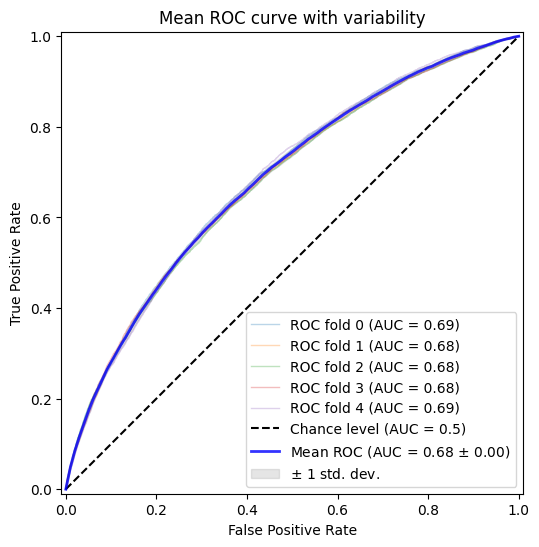

In [43]:
log_reg = roc_auc_plot(train, train_labels, cv=kfold, classifier=log_reg)

In [44]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

# Submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.069942
1,100005,0.100977
2,100013,0.064911
3,100028,0.074376
4,100038,0.106937


(array([5.1600e+02, 5.6050e+03, 1.2859e+04, 1.2866e+04, 9.9150e+03,
        4.8210e+03, 1.7310e+03, 3.7200e+02, 5.5000e+01, 4.0000e+00]),
 array([0.035263  , 0.04817443, 0.06108587, 0.07399731, 0.08690875,
        0.09982018, 0.11273162, 0.12564306, 0.1385545 , 0.15146593,
        0.16437737]),
 <BarContainer object of 10 artists>)

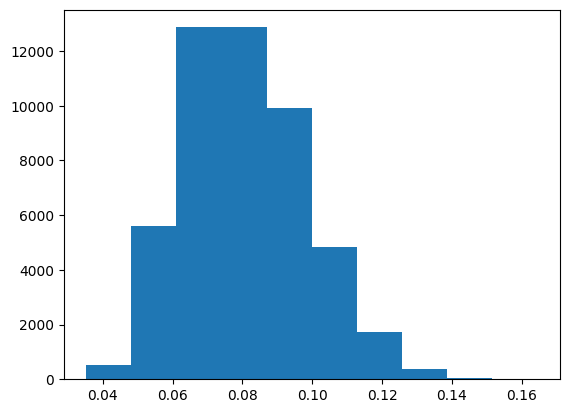

In [45]:
plt.hist(log_reg_pred)

Seluruh prediksi bernilai < 0.5

In [46]:
# Save the submission to a csv file
submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/log_reg_baseline.csv', index = False)

#### unused

In [47]:
# scoring = ['roc_auc', 'f1']
# # Perform Cross-Validation
# scores = cross_validate(log_reg, train, train_labels, cv=kfold, scoring=scoring, return_estimator=True) # new


# Print Average Scores
# print("Average ROC AUC: {:.2f}".format(np.mean(scores['test_roc_auc'])))
# print("Average F1 Score: {:.2f}".format(np.mean(scores['test_f1'])))

# Train on the training data
# log_reg.fit(train, train_labels)

# print(scores)

# fitted_estimators = scores['estimator']
# log_reg = fitted_estimators[np.argmax(scores['test_roc_auc'])]

### SGD
score = 0.72

In [9]:
from sklearn.linear_model import SGDClassifier

In [49]:
sgd_classifier = SGDClassifier(loss='modified_huber', random_state=2024)

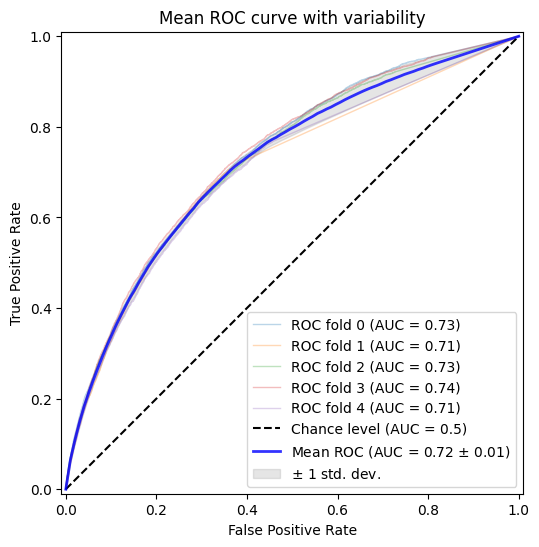

In [50]:
sgd_classifier = roc_auc_plot(train, train_labels, cv=kfold, classifier=sgd_classifier)

In [51]:
# Make predictions on the test data
predictions = sgd_classifier.predict_proba(test)[:, 1]

# Make a submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = predictions
print(submit.head())

   SK_ID_CURR    TARGET
0      100001  0.013302
1      100005  0.084539
2      100013  0.000000
3      100028  0.000000
4      100038  0.026888


In [52]:
# Save the submission dataframe
submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/sgd_classifier_baseline.csv', index = False)

### Naive Bayes
Score: 0.58 +- 0.01

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
gnb_clf = GaussianNB()

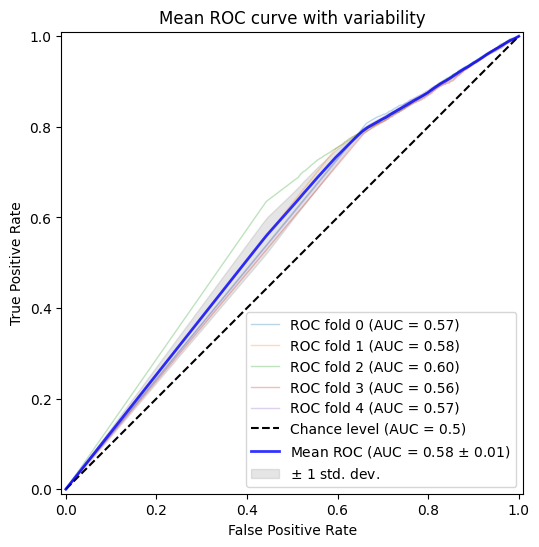

In [55]:
gnb_clf = roc_auc_plot(train, train_labels, cv=kfold, classifier=gnb_clf)

In [56]:
# Make predictions on the test data
predictions = gnb_clf.predict_proba(test)[:, 1]

# Make a submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = predictions
print(submit.head())

   SK_ID_CURR        TARGET
0      100001  1.000000e+00
1      100005  1.000000e+00
2      100013  1.000000e+00
3      100028  2.340385e-09
4      100038  1.000000e+00


In [57]:
# Save the submission dataframe
submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/gnb_clf_baseline.csv', index = False)

### BernoulliNB
Score: 0.62

In [58]:
from sklearn.naive_bayes import BernoulliNB

In [59]:
bnb = BernoulliNB()

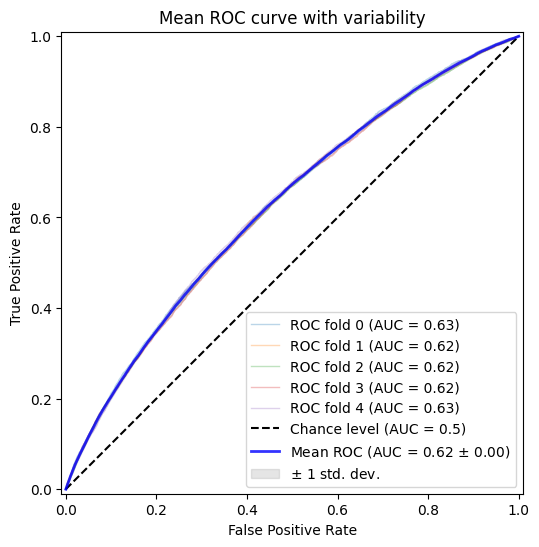

In [60]:
bnb = roc_auc_plot(train, train_labels, cv=kfold, classifier=bnb)

In [61]:
# Make predictions on the test data
predictions = bnb.predict_proba(test)[:, 1]

# Make a submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = predictions
print(submit.head())

   SK_ID_CURR    TARGET
0      100001  0.467928
1      100005  0.459403
2      100013  0.113088
3      100028  0.018208
4      100038  0.487367


In [62]:
# Save the submission dataframe
submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/bnb_baseline.csv', index = False)

### LightGBM
Score: 0.75

In [67]:
!pip install lightgbm

In [10]:
from lightgbm import LGBMClassifier

In [69]:
lgb = LGBMClassifier(n_estimators=1000, objective = 'binary',
                     class_weight = 'balanced', learning_rate = 0.05,
                     reg_alpha = 0.1, reg_lambda = 0.1,
                     subsample = 0.8, n_jobs = -1, random_state = 50)

[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.187051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11618
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 231
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19888, number of negative: 226121
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.405717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11616
[LightGBM] [Info] Number of data points in the train set: 246009, number of used features: 229
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0000

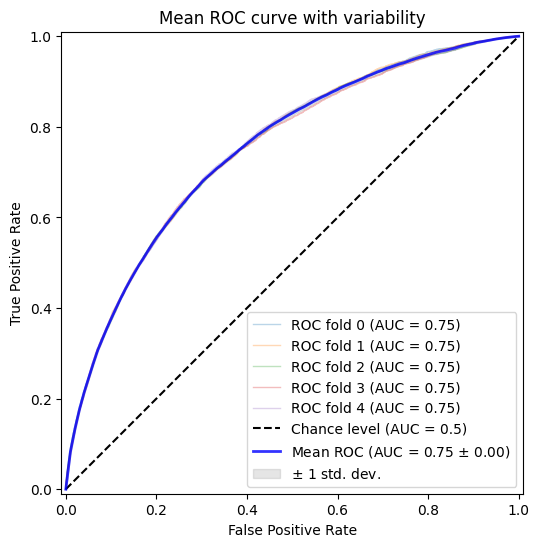

In [70]:
lgb = roc_auc_plot(train, train_labels, cv=kfold, classifier=lgb)

In [71]:
# Make predictions on the test data
predictions = lgb.predict_proba(test)[:, 1]

# Make a submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = predictions
print(submit.head())

   SK_ID_CURR    TARGET
0      100001  0.161719
1      100005  0.197959
2      100013  0.035123
3      100028  0.141083
4      100038  0.498024


In [72]:
# Save the submission dataframe
submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/lgb_baseline.csv', index = False)

### Model Tidak Digunakan
Classifier di bawah ini tidak digunakan karena hasilnya kurang memuaskan, fitting terlalu lama, dan/atau makan RAM

#### Random Forest
score = 0.69144, fit sedikit lama

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Make the random forest classifier
# random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parall

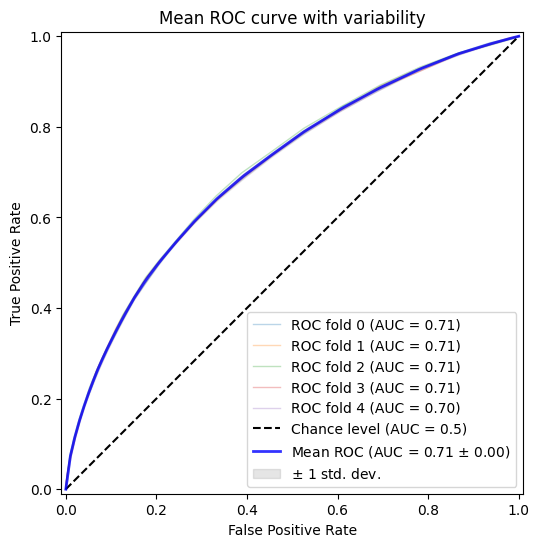

In [ ]:
# random_forest = roc_auc_plot(train, train_labels, cv=kfold, classifier=random_forest)

# Perform Cross-Validation
# scores = cross_validate(random_forest, train, train_labels, cv=kfold, scoring=scoring, return_estimator=True) # new

# # Print Average Scores
# print("Average ROC AUC: {:.2f}".format(np.mean(scores['test_roc_auc'])))
# print("Average F1 Score: {:.2f}".format(np.mean(scores['test_f1'])))

# # Train on the training data
# random_forest.fit(train, train_labels)

Average ROC AUC: 0.71

Average F1 Score: 0.00

In [ ]:
# # Extract feature importances
# feature_importance_values = random_forest.feature_importances_
# feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# # Make predictions on the test data
# predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.0s finished


In [ ]:
# # Make a submission dataframe
# submit = test_df[['SK_ID_CURR']]
# submit['TARGET'] = predictions
# print(submit.head())
# # Save the submission dataframe
# submit.to_csv('random_forest_baseline.csv', index = False)

   SK_ID_CURR  TARGET
0      100001    0.11
1      100005    0.10
2      100013    0.04
3      100028    0.06
4      100038    0.14


In [ ]:
# # Sort the DataFrame by 'importance' in descending order
# feature_importances = feature_importances.sort_values(by='importance', ascending=False)[:30]

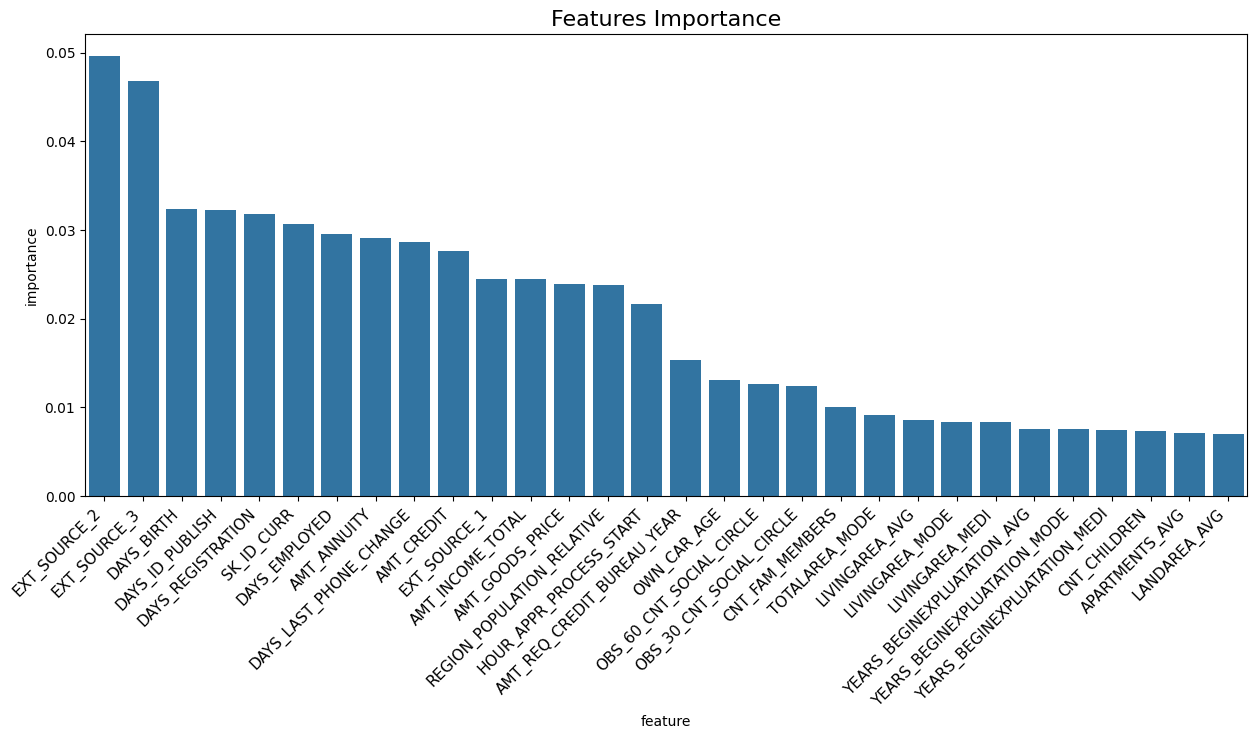

In [ ]:
# # Increase figure size
# plt.figure(figsize=(15, 6))

# # Plot the barplot
# plt.title('Features Importance', fontsize=16)
# s = sns.barplot(x='feature', y='importance', data=feature_importances)

# # Rotate labels and adjust font size
# s.set_xticklabels(s.get_xticklabels(), rotation=45, ha='right', fontsize=11)

# plt.show()

#### KNN
*fit terlalu lama* Score = 0.55377

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

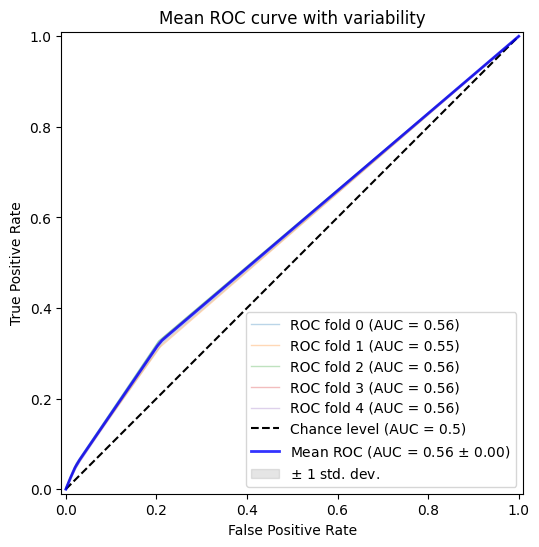

In [ ]:
# knn = KNeighborsClassifier(n_neighbors=3)

# knn = roc_auc_plot(train, train_labels, cv=kfold, classifier=knn)

Mean ROC AUC = 0.56

In [ ]:
# # Make predictions on the test data
# predictions = knn.predict_proba(test)[:, 1]

In [ ]:
# # Make a submission dataframe
# submit = test_df[['SK_ID_CURR']]
# submit['TARGET'] = predictions
# print(submit.head())
# # Save the submission dataframe
# submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/knn_baseline.csv', index = False)

   SK_ID_CURR  TARGET
0      100001     0.2
1      100005     0.2
2      100013     0.0
3      100028     0.0
4      100038     0.2


model terbaik sebelum feature engineering = sgd_sclassifier

#### Gaussian Process Classifier

In [ ]:
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF

In [ ]:
# gpc_clf = GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42)

In [ ]:
# gpc_clf = roc_auc_plot(train, train_labels, cv=kfold, classifier=gpc_clf)

In [ ]:
# # Make predictions on the test data
# predictions = gpc_clf.predict_proba(test)[:, 1]

# # Make a submission dataframe
# submit = test_df[['SK_ID_CURR']]
# submit['TARGET'] = predictions
# print(submit.head())

In [ ]:
# # Save the submission dataframe
# submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/gpc_clf_baseline.csv', index = False)

#### AdaBoostClassifier


In [63]:
from sklearn.ensemble import AdaBoostClassifier

In [64]:
abc = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)

KeyboardInterrupt: 

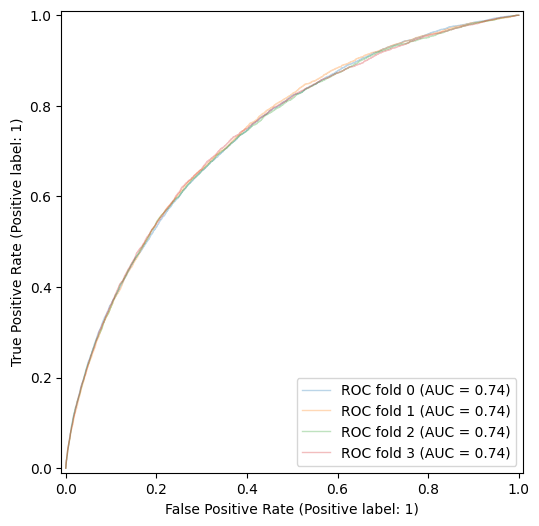

In [65]:
abc = roc_auc_plot(train, train_labels, cv=kfold, classifier=abc)

In [66]:
# Make predictions on the test data
predictions = abc.predict_proba(test)[:, 1]

# Make a submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = predictions
print(submit.head())

AttributeError: 'list' object has no attribute 'take'

In [ ]:
# Save the submission dataframe
submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/abc_baseline.csv', index = False)

## Feature Engineering


### Domain knowledge engineering
Terdapat beberapa data tambahan yang dapat digunakan untuk menentukan apakah seseorang akan kesulitan membayar atau tidak. Beberapa contohnya dari tabel application:
1. DAYS_EMPLOYED_PERCENT: rasio antara lama kerja client terhadap umurnya
2. INCOME_CREDIT_PERCENT: rasio antara pendapaatan client dengan jumlah pinjaman
3. INCOME_PER_PERSON : membagi pendapatan client dengan jumlah keluarga
4. ANNUITY_INCOME_PERCENT: rasio annuity dan pendapatan client
5. PAYMENT_RATE: lamanya pembayaran dalam bulan (annuity adalah pembayaran per bulan)

In [73]:
def add_features(df):
    print(f'before: {df.shape}')
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    print(f'after: {df.shape}')

In [74]:
add_features(train_df)
add_features(test_df)

before: (307511, 238)
after: (307511, 243)
before: (48744, 237)
after: (48744, 242)


### Polynomial features
Polynomial features untuk beberapa kolom yang sekiranya memiliki korelasi (belum analisis, baru berdasarkan domain knowledge)

In [75]:
features_to_engineer = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1',
                        'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL',
                        'AMT_CREDIT', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS']

In [76]:
poly_train = train_df[features_to_engineer]
poly_test = test_df[features_to_engineer]

In [77]:
# imputer for handling missing values
imputer = SimpleImputer(strategy = 'median')

# Need to impute missing values
poly_train = imputer.fit_transform(poly_train)
poly_test = imputer.transform(poly_test)

from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [78]:
# Train the polynomial features
# IMPORTANT: RUN ONCE
poly_transformer.fit(poly_train)

# Transform the features
poly_train = poly_transformer.transform(poly_train)
poly_test = poly_transformer.transform(poly_test)

In [79]:
print('Polynomial train df shape: ', poly_train.shape)
print('Polynomial test df shape: ', poly_test.shape)

Polynomial train df shape:  (307511, 220)
Polynomial test df shape:  (48744, 220)


In [80]:
poly_transformer.get_feature_names_out(features_to_engineer)[:10]

array(['1', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'CNT_FAM_MEMBERS'], dtype=object)

In [81]:
# Create a dataframe of the features
poly_train = pd.DataFrame(poly_train, columns = poly_transformer.get_feature_names_out(features_to_engineer))
# Add in the target
poly_train['TARGET'] = train_labels

In [82]:
# Put test features into dataframe
poly_test = pd.DataFrame(poly_test,
            columns = poly_transformer.get_feature_names_out(features_to_engineer))

In [83]:
# Merge polynomial features into training dataframe
poly_train['SK_ID_CURR'] = train_df['SK_ID_CURR']
app_train_pd = train_df.merge(poly_train, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_test['SK_ID_CURR'] = test_df['SK_ID_CURR']
app_test_pd = test_df.merge(poly_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_pd, app_test_pd = app_train_pd.align(app_test_pd, join = 'inner', axis = 1)
app_train_pd['TARGET'] = train_df['TARGET']

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_pd.shape)
print('Testing data with polynomial features shape:  ', app_test_pd.shape)

Training data with polynomial features shape:  (307511, 463)
Testing data with polynomial features shape:   (48744, 462)


### Optional

In [84]:
del poly_train, poly_test
gc.collect()

5111

In [85]:
# Find the correlations with the target
poly_corrs = app_train_pd.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(10))
del poly_corrs
gc.collect()

EXT_SOURCE_3 EXT_SOURCE_2                -0.193939
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1   -0.189605
EXT_SOURCE_3_x                           -0.178919
EXT_SOURCE_3 EXT_SOURCE_2^2              -0.176428
EXT_SOURCE_3^2 EXT_SOURCE_2              -0.172282
EXT_SOURCE_2 EXT_SOURCE_1                -0.166625
EXT_SOURCE_3 EXT_SOURCE_1                -0.164065
EXT_SOURCE_2_x                           -0.160472
EXT_SOURCE_2_y                           -0.160295
EXT_SOURCE_2^2 EXT_SOURCE_1              -0.156867
Name: TARGET, dtype: float64
EXT_SOURCE_2 DAYS_BIRTH CNT_FAM_MEMBERS    0.123111
EXT_SOURCE_3^2 DAYS_BIRTH                  0.141777
EXT_SOURCE_2^2 DAYS_BIRTH                  0.149313
EXT_SOURCE_3 DAYS_BIRTH                    0.150109
EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH       0.151816
EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH       0.155891
EXT_SOURCE_2 DAYS_BIRTH                    0.156873
EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH       0.181283
TARGET                                     1.

0

## Model setelah feature engineering

### Preprocessing

In [86]:
# preprocess dataset
train, test, features = preprocess(app_train_pd, app_test_pd)

Training data shape:  (307511, 462)
Testing data shape:  (48744, 462)


### Logistic Regression
Score: 0.73

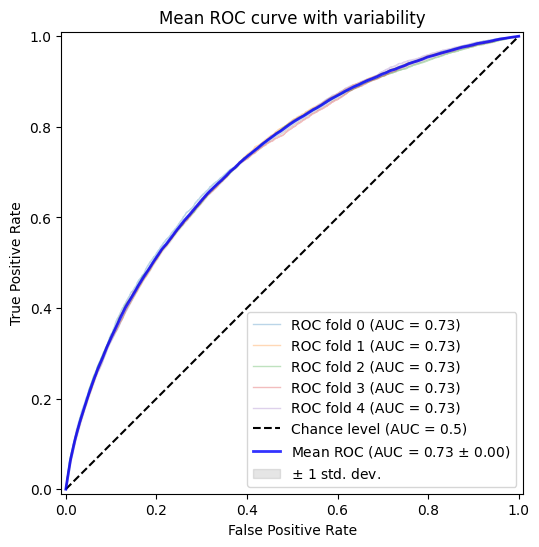

In [87]:
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

log_reg = roc_auc_plot(train, train_labels, cv=kfold, classifier=log_reg)

In [88]:
# Make predictions
log_reg_pred = log_reg.predict_proba(test)[:, 1]

   SK_ID_CURR    TARGET
0      100001  0.059451
1      100005  0.117069
2      100013  0.040917
3      100028  0.066997
4      100038  0.123094


(array([2.5210e+03, 1.1979e+04, 1.3941e+04, 1.0053e+04, 5.8800e+03,
        2.8600e+03, 1.1440e+03, 3.0300e+02, 6.0000e+01, 3.0000e+00]),
 array([0.01287276, 0.03637096, 0.05986916, 0.08336736, 0.10686556,
        0.13036376, 0.15386196, 0.17736016, 0.20085836, 0.22435656,
        0.24785476]),
 <BarContainer object of 10 artists>)

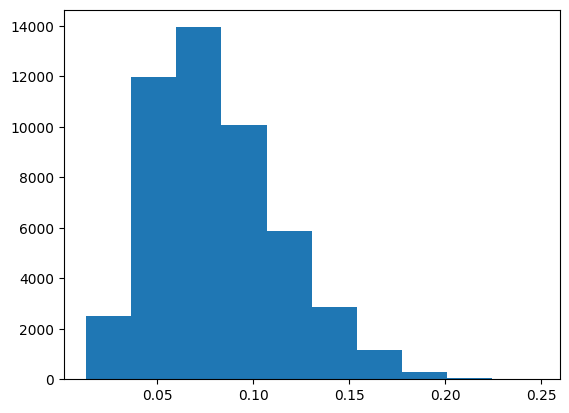

In [89]:
# Submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

print(submit.head())
plt.hist(log_reg_pred)

In [90]:
# Save the submission to a csv file
submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/log_reg_feature_engineered.csv', index = False)

### SGD
Score: 0.72 +- 0.01

In [91]:
sgd_classifier = SGDClassifier(loss='modified_huber', random_state=2024)

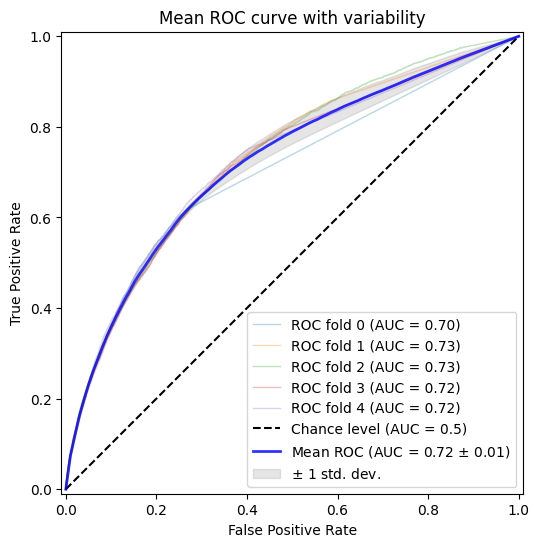

In [92]:
sgd_classifier = roc_auc_plot(train, train_labels, cv=kfold, classifier=sgd_classifier)

In [93]:
# Make predictions on the test data
predictions = sgd_classifier.predict_proba(test)[:, 1]

# Make a submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = predictions
print(submit.head())

   SK_ID_CURR    TARGET
0      100001  0.000000
1      100005  0.154365
2      100013  0.000000
3      100028  0.000000
4      100038  0.041681


In [94]:
# Save the submission dataframe
submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/sgd_classifier_feature_engineered.csv', index = False)

### Naive Bayes
Score: 0.66 +- 0.04

In [95]:
gnb_clf = GaussianNB()

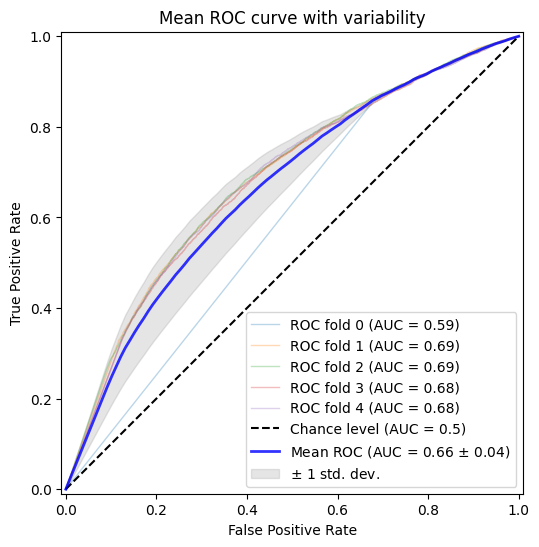

In [96]:
gnb_clf = roc_auc_plot(train, train_labels, cv=kfold, classifier=gnb_clf)

In [97]:
# Make predictions on the test data
predictions = gnb_clf.predict_proba(test)[:, 1]

# Make a submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = predictions
print(submit.head())

   SK_ID_CURR        TARGET
0      100001  9.115344e-16
1      100005  1.000000e+00
2      100013  3.947801e-98
3      100028  1.649292e-86
4      100038  1.000000e+00


In [98]:
# Save the submission dataframe
submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/gnb_clf_feature_engineered.csv', index = False)

### BernoulliNB
Score: 0.62

In [99]:
bnb = BernoulliNB()

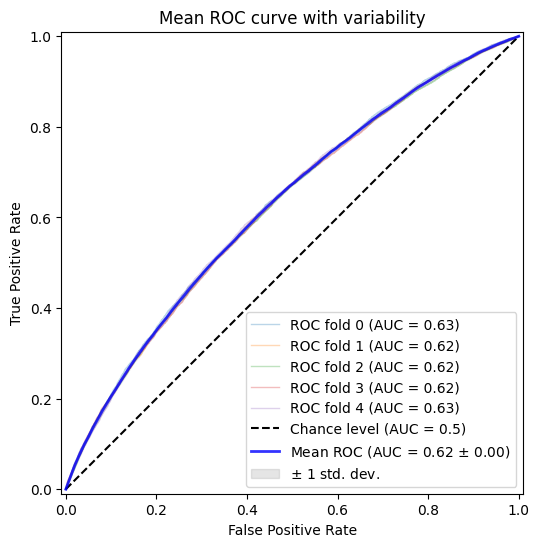

In [100]:
bnb = roc_auc_plot(train, train_labels, cv=kfold, classifier=bnb)

In [101]:
# Make predictions on the test data
predictions = bnb.predict_proba(test)[:, 1]

# Make a submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = predictions
print(submit.head())

   SK_ID_CURR    TARGET
0      100001  0.452341
1      100005  0.443863
2      100013  0.106945
3      100028  0.017120
4      100038  0.471707


In [102]:
# Save the submission dataframe
submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/bnb_feature_engineered.csv', index = False)

### LightGBM
Score: 0.76

In [103]:
lgb = LGBMClassifier(n_estimators=1000, objective = 'binary',
                     class_weight = 'balanced', learning_rate = 0.05,
                     reg_alpha = 0.1, reg_lambda = 0.1,
                     subsample = 0.8, n_jobs = -1, random_state = 50)

[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.134608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67779
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 455
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19888, number of negative: 226121
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.802055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67779
[LightGBM] [Info] Number of data points in the train set: 246009, number of used features: 453
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGB

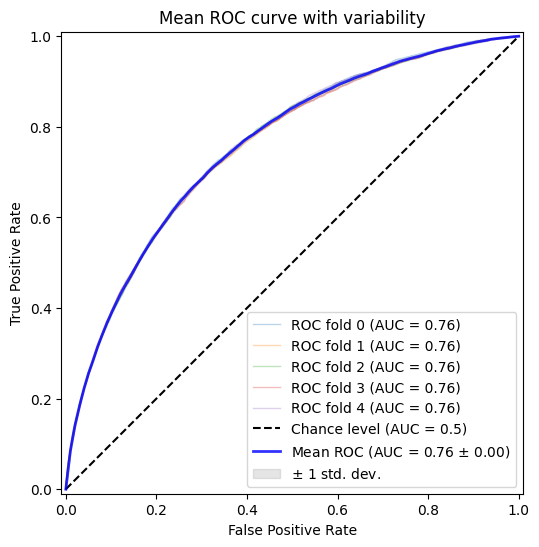

In [104]:
lgb = roc_auc_plot(train, train_labels, cv=kfold, classifier=lgb)

In [105]:
# Make predictions on the test data
predictions = lgb.predict_proba(test)[:, 1]

# Make a submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = predictions
print(submit.head())

   SK_ID_CURR    TARGET
0      100001  0.161095
1      100005  0.242755
2      100013  0.025411
3      100028  0.119149
4      100038  0.536400


In [106]:
# Save the submission dataframe
submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/lgb_feature_engineered.csv', index = False)

## Kesimpulan Model Baseline dan Setelah Feature Engineering
SGD, Logistic Regression, dan LightGBM konsisten menghasilkan score lebih besar.

Score untuk dikalahkan: 0.76 dari LightGBM.

Feature Engineering berhasil meningkatkan ROC-AUC beberapa model.

Langkah selanjutnya:
1. Penggabungan data dengan tabel lain
2. Feature engineering (lagi) dan feature selection
3. Hyperparameter tuning

## Penggabungan dengan data previous application dan bureau
Penggabungan akan menggunakan agregat untuk data previous application dan bureau

### Agregat

In [34]:
def agg_df(df, group_by, df_name):
  group_ids = df[group_by]
  numeric_df = df.select_dtypes('number')
  numeric_df[group_by] = group_ids

  # Group by the specified variable and calculate the statistics
  agg = numeric_df.groupby(group_by).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
  # Need to create new column names
  column_names = [group_by]

  # Iterate through the variables names
  for var in agg.columns.levels[0]:
      # Skip the grouping variable
      if var != group_by:
          # Iterate through the stat names
          for stat in agg.columns.levels[1][:-1]:
              # Make a new column name for the variable and stat
              column_names.append('%s_%s_%s' % (df_name, var, stat))

  agg.columns = column_names

  return agg

In [35]:
def count_categorical(df, group_by, df_name):
  # Select the categorical columns
  categorical = pd.get_dummies(df.select_dtypes('object'))

  # Make sure to put the identifying id on the column
  categorical[group_by] = df[group_by]

  # Groupby the group var and calculate the sum and mean
  categorical = categorical.groupby(group_by).agg(['sum', 'mean'])

  column_names = []

  # Iterate through the columns in level 0
  for var in categorical.columns.levels[0]:
      # Iterate through the stats in level 1
      for stat in ['count', 'count_norm']:
          # Make a new column name
          column_names.append('%s_%s_%s' % (df_name, var, stat))

  categorical.columns = column_names

  return categorical

### Load data Burreau
Data pinjaman sebelumnya dari institusi lain

In [36]:
# Read in bureau
bureau = pd.read_csv('/content/gdrive/MyDrive/RAKAMIN/bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [37]:
bureau_agg = agg_df(bureau.drop(columns = ['SK_ID_BUREAU']), group_by = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,0.0
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,0.0
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


In [38]:
bureau_counts = count_categorical(bureau, group_by = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head()

,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_count_norm,...,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [39]:
bureau_new = bureau_agg.merge(bureau_counts, right_index = True, left_on = 'SK_ID_CURR', how = 'outer')

# Merge to include the SK_ID_CURR
# bureau_new = bureau_new.merge(bureau[['SK_ID_BUREAU', 'SK_ID_CURR']], on = 'SK_ID_CURR', how = 'left')
bureau_new.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [40]:
train_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,1,0,1,0,1,0.067329,0.498036,202500.0,0.121978,0.060749
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,1,0,0,0.070862,0.208736,135000.0,0.132217,0.027598
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0.011814,0.500000,67500.0,0.100000,0.050000
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0.159905,0.431748,67500.0,0.219900,0.094941
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0.152418,0.236842,121500.0,0.179963,0.042623


In [41]:
print("-----------------------")
# Merge with bureau
train_df = train_df.merge(bureau_new, on = 'SK_ID_CURR', how = 'left')
train_df.head()

-----------------------


,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
test_df = test_df.merge(bureau_new, on = 'SK_ID_CURR', how = 'left')
test_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
del bureau_agg, bureau_counts, bureau, bureau_new
gc.collect()

0

### Load Data Previous Application

In [44]:
prev_app = pd.read_csv('/content/gdrive/MyDrive/RAKAMIN/previous_application.csv')
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Outlier

In [45]:
# Days 365.243 values -> nan
prev_app['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
prev_app['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
prev_app['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
prev_app['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
prev_app['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

#### Aggregate

In [46]:
prev_app_agg = agg_df(prev_app.drop(columns = ['SK_ID_PREV']), group_by = 'SK_ID_CURR', df_name = 'prev_app')
prev_app_agg.head()

,SK_ID_CURR,prev_app_AMT_ANNUITY_count,prev_app_AMT_ANNUITY_mean,prev_app_AMT_ANNUITY_max,prev_app_AMT_ANNUITY_min,prev_app_AMT_ANNUITY_sum,prev_app_AMT_APPLICATION_count,prev_app_AMT_APPLICATION_mean,prev_app_AMT_APPLICATION_max,prev_app_AMT_APPLICATION_min,...,prev_app_DAYS_TERMINATION_count,prev_app_DAYS_TERMINATION_mean,prev_app_DAYS_TERMINATION_max,prev_app_DAYS_TERMINATION_min,prev_app_DAYS_TERMINATION_sum,prev_app_NFLAG_INSURED_ON_APPROVAL_count,prev_app_NFLAG_INSURED_ON_APPROVAL_mean,prev_app_NFLAG_INSURED_ON_APPROVAL_max,prev_app_NFLAG_INSURED_ON_APPROVAL_min,prev_app_NFLAG_INSURED_ON_APPROVAL_sum
0,100001,1,3951.000,3951.000,3951.000,3951.000,1,24835.50,24835.5,24835.5,...,1,-1612.000000,-1612.0,-1612.0,-1612.0,1,0.000000,0.0,0.0,0.0
1,100002,1,9251.775,9251.775,9251.775,9251.775,1,179055.00,179055.0,179055.0,...,1,-17.000000,-17.0,-17.0,-17.0,1,0.000000,0.0,0.0,0.0
2,100003,3,56553.990,98356.995,6737.310,169661.970,3,435436.50,900000.0,68809.5,...,3,-1047.333333,-527.0,-1976.0,-3142.0,3,0.666667,1.0,0.0,2.0
3,100004,1,5357.250,5357.250,5357.250,5357.250,1,24282.00,24282.0,24282.0,...,1,-714.000000,-714.0,-714.0,-714.0,1,0.000000,0.0,0.0,0.0
4,100005,1,4813.200,4813.200,4813.200,4813.200,2,22308.75,44617.5,0.0,...,1,-460.000000,-460.0,-460.0,-460.0,1,0.000000,0.0,0.0,0.0


In [47]:
prev_app_count = count_categorical(prev_app, group_by = 'SK_ID_CURR', df_name = 'prev_app')
prev_app_count.head()

,prev_app_NAME_CONTRACT_TYPE_Cash loans_count,prev_app_NAME_CONTRACT_TYPE_Cash loans_count_norm,prev_app_NAME_CONTRACT_TYPE_Consumer loans_count,prev_app_NAME_CONTRACT_TYPE_Consumer loans_count_norm,prev_app_NAME_CONTRACT_TYPE_Revolving loans_count,prev_app_NAME_CONTRACT_TYPE_Revolving loans_count_norm,prev_app_NAME_CONTRACT_TYPE_XNA_count,prev_app_NAME_CONTRACT_TYPE_XNA_count_norm,prev_app_WEEKDAY_APPR_PROCESS_START_FRIDAY_count,prev_app_WEEKDAY_APPR_PROCESS_START_FRIDAY_count_norm,...,prev_app_PRODUCT_COMBINATION_POS industry without interest_count,prev_app_PRODUCT_COMBINATION_POS industry without interest_count_norm,prev_app_PRODUCT_COMBINATION_POS mobile with interest_count,prev_app_PRODUCT_COMBINATION_POS mobile with interest_count_norm,prev_app_PRODUCT_COMBINATION_POS mobile without interest_count,prev_app_PRODUCT_COMBINATION_POS mobile without interest_count_norm,prev_app_PRODUCT_COMBINATION_POS other with interest_count,prev_app_PRODUCT_COMBINATION_POS other with interest_count_norm,prev_app_PRODUCT_COMBINATION_POS others without interest_count,prev_app_PRODUCT_COMBINATION_POS others without interest_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,0,0.000000,1,1.000000,0,0.0,0,0.0,1,1.000000,...,0,0.0,1,1.0,0,0.0,0,0.0,0,0.0
100002,0,0.000000,1,1.000000,0,0.0,0,0.0,0,0.000000,...,0,0.0,0,0.0,0,0.0,1,1.0,0,0.0
100003,1,0.333333,2,0.666667,0,0.0,0,0.0,1,0.333333,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100004,0,0.000000,1,1.000000,0,0.0,0,0.0,1,1.000000,...,0,0.0,0,0.0,1,1.0,0,0.0,0,0.0
100005,1,0.500000,1,0.500000,0,0.0,0,0.0,1,0.500000,...,0,0.0,1,0.5,0,0.0,0,0.0,0,0.0


In [48]:
prev_app_new = prev_app_agg.merge(prev_app_count, right_index = True, left_on = 'SK_ID_CURR', how = 'outer')

# Merge to include the SK_ID_CURR
# prev_app_new = prev_app_new.merge(prev_app[['SK_ID_PREV', 'SK_ID_CURR']], on = 'SK_ID_PREV', how = 'left')
prev_app_new.head()

,SK_ID_CURR,prev_app_AMT_ANNUITY_count,prev_app_AMT_ANNUITY_mean,prev_app_AMT_ANNUITY_max,prev_app_AMT_ANNUITY_min,prev_app_AMT_ANNUITY_sum,prev_app_AMT_APPLICATION_count,prev_app_AMT_APPLICATION_mean,prev_app_AMT_APPLICATION_max,prev_app_AMT_APPLICATION_min,...,prev_app_PRODUCT_COMBINATION_POS industry without interest_count,prev_app_PRODUCT_COMBINATION_POS industry without interest_count_norm,prev_app_PRODUCT_COMBINATION_POS mobile with interest_count,prev_app_PRODUCT_COMBINATION_POS mobile with interest_count_norm,prev_app_PRODUCT_COMBINATION_POS mobile without interest_count,prev_app_PRODUCT_COMBINATION_POS mobile without interest_count_norm,prev_app_PRODUCT_COMBINATION_POS other with interest_count,prev_app_PRODUCT_COMBINATION_POS other with interest_count_norm,prev_app_PRODUCT_COMBINATION_POS others without interest_count,prev_app_PRODUCT_COMBINATION_POS others without interest_count_norm
0,100001,1,3951.000,3951.000,3951.000,3951.000,1,24835.50,24835.5,24835.5,...,0,0.0,1,1.0,0,0.0,0,0.0,0,0.0
1,100002,1,9251.775,9251.775,9251.775,9251.775,1,179055.00,179055.0,179055.0,...,0,0.0,0,0.0,0,0.0,1,1.0,0,0.0
2,100003,3,56553.990,98356.995,6737.310,169661.970,3,435436.50,900000.0,68809.5,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,100004,1,5357.250,5357.250,5357.250,5357.250,1,24282.00,24282.0,24282.0,...,0,0.0,0,0.0,1,1.0,0,0.0,0,0.0
4,100005,1,4813.200,4813.200,4813.200,4813.200,2,22308.75,44617.5,0.0,...,0,0.0,1,0.5,0,0.0,0,0.0,0,0.0


In [49]:
train_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
print("-----------------------")
# Merge with bureau
train_df = train_df.merge(prev_app_new, on = 'SK_ID_CURR', how = 'left')
train_df.head()

-----------------------


,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,prev_app_PRODUCT_COMBINATION_POS industry without interest_count,prev_app_PRODUCT_COMBINATION_POS industry without interest_count_norm,prev_app_PRODUCT_COMBINATION_POS mobile with interest_count,prev_app_PRODUCT_COMBINATION_POS mobile with interest_count_norm,prev_app_PRODUCT_COMBINATION_POS mobile without interest_count,prev_app_PRODUCT_COMBINATION_POS mobile without interest_count_norm,prev_app_PRODUCT_COMBINATION_POS other with interest_count,prev_app_PRODUCT_COMBINATION_POS other with interest_count_norm,prev_app_PRODUCT_COMBINATION_POS others without interest_count,prev_app_PRODUCT_COMBINATION_POS others without interest_count_norm
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0.0,0.0,1.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
test_df = test_df.merge(prev_app_new, on = 'SK_ID_CURR', how = 'left')
test_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,prev_app_PRODUCT_COMBINATION_POS industry without interest_count,prev_app_PRODUCT_COMBINATION_POS industry without interest_count_norm,prev_app_PRODUCT_COMBINATION_POS mobile with interest_count,prev_app_PRODUCT_COMBINATION_POS mobile with interest_count_norm,prev_app_PRODUCT_COMBINATION_POS mobile without interest_count,prev_app_PRODUCT_COMBINATION_POS mobile without interest_count_norm,prev_app_PRODUCT_COMBINATION_POS other with interest_count,prev_app_PRODUCT_COMBINATION_POS other with interest_count_norm,prev_app_PRODUCT_COMBINATION_POS others without interest_count,prev_app_PRODUCT_COMBINATION_POS others without interest_count_norm
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0.0,0.0,1.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0.0,0.0,1.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0.0,0.0,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0.0,0.0,1.0,0.20,0.0,0.0,0.0,0.0,0.0,0.0
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0.0,0.0,1.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
del prev_app_agg, prev_app_count, prev_app, prev_app_new
gc.collect()

0

## Feature Selection

### Drop variabel collinear
Beberapa variabbel dapat memiliki korelasi yang terlalu besar dengan variabel lainnya. Hal ini bisa mengurangi performa dari model yang dibangun.

*Note: Cukup lama jadi run sekali saja tiap ada perubahan lagi ke dataset*

In [36]:
# Calculate all correlations in dataframe
corrs = train_df.corr()
corrs = corrs.sort_values('TARGET', ascending = False)

,TARGET
TARGET,1.000000
prev_app_DAYS_FIRST_DRAWING_max,0.096222
prev_app_DAYS_FIRST_DRAWING_mean,0.096119
prev_app_DAYS_FIRST_DRAWING_min,0.095787
bureau_DAYS_CREDIT_mean,0.089729
DAYS_BIRTH,0.078239
prev_app_NAME_CONTRACT_STATUS_Refused_count_norm,0.077671
bureau_CREDIT_ACTIVE_Active_count_norm,0.077356
bureau_DAYS_CREDIT_min,0.075248
DAYS_EMPLOYED,0.074958


In [37]:
# Set the threshold
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

In [38]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            continue
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)

cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  196


In [42]:
print(cols_to_remove)

['prev_app_RATE_DOWN_PAYMENT_count', 'prev_app_DAYS_TERMINATION_count', 'prev_app_AMT_GOODS_PRICE_max', 'bureau_CREDIT_TYPE_Mobile operator loan_count_norm', 'prev_app_NAME_GOODS_CATEGORY_XNA_count_norm', 'bureau_AMT_CREDIT_MAX_OVERDUE_sum', 'bureau_CREDIT_TYPE_Interbank credit_count_norm', 'prev_app_NAME_CASH_LOAN_PURPOSE_XAP_count', 'prev_app_NAME_PORTFOLIO_POS_count_norm', 'prev_app_CHANNEL_TYPE_Car dealer_count_norm', 'prev_app_NAME_CASH_LOAN_PURPOSE_XNA_count', 'APARTMENTS_MEDI', 'prev_app_DAYS_FIRST_DRAWING_sum', 'prev_app_HOUR_APPR_PROCESS_START_count', 'prev_app_RATE_INTEREST_PRIMARY_min', 'prev_app_DAYS_TERMINATION_sum', 'LANDAREA_MODE', 'prev_app_NAME_PORTFOLIO_Cards_count', 'prev_app_AMT_DOWN_PAYMENT_max', 'prev_app_PRODUCT_COMBINATION_Card X-Sell_count_norm', 'bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count_norm', 'prev_app_AMT_APPLICATION_max', 'prev_app_NAME_PORTFOLIO_Cash_count', 'prev_app_NAME_CONTRACT_TYPE_Consumer loans_count', 'prev_app_RATE_DOWN_PAYMENT_min', 'pr

### Langsung ke sini

In [53]:
cols_to_remove = ['prev_app_RATE_DOWN_PAYMENT_count', 'prev_app_DAYS_TERMINATION_count', 'prev_app_AMT_GOODS_PRICE_max', 'bureau_CREDIT_TYPE_Mobile operator loan_count_norm', 'prev_app_NAME_GOODS_CATEGORY_XNA_count_norm', 'bureau_AMT_CREDIT_MAX_OVERDUE_sum', 'bureau_CREDIT_TYPE_Interbank credit_count_norm', 'prev_app_NAME_CASH_LOAN_PURPOSE_XAP_count', 'prev_app_NAME_PORTFOLIO_POS_count_norm', 'prev_app_CHANNEL_TYPE_Car dealer_count_norm', 'prev_app_NAME_CASH_LOAN_PURPOSE_XNA_count', 'APARTMENTS_MEDI', 'prev_app_DAYS_FIRST_DRAWING_sum', 'prev_app_HOUR_APPR_PROCESS_START_count', 'prev_app_RATE_INTEREST_PRIMARY_min', 'prev_app_DAYS_TERMINATION_sum', 'LANDAREA_MODE', 'prev_app_NAME_PORTFOLIO_Cards_count', 'prev_app_AMT_DOWN_PAYMENT_max', 'prev_app_PRODUCT_COMBINATION_Card X-Sell_count_norm', 'bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count_norm', 'prev_app_AMT_APPLICATION_max', 'prev_app_NAME_PORTFOLIO_Cash_count', 'prev_app_NAME_CONTRACT_TYPE_Consumer loans_count', 'prev_app_RATE_DOWN_PAYMENT_min', 'prev_app_DAYS_LAST_DUE_count', 'bureau_CREDIT_ACTIVE_Bad debt_count_norm', 'prev_app_NAME_SELLER_INDUSTRY_Clothing_count_norm', 'NONLIVINGAPARTMENTS_MODE', 'bureau_DAYS_CREDIT_ENDDATE_count', 'prev_app_AMT_CREDIT_sum', 'prev_app_AMT_GOODS_PRICE_sum', 'prev_app_CODE_REJECT_REASON_CLIENT_count', 'prev_app_DAYS_LAST_DUE_min', 'bureau_AMT_CREDIT_MAX_OVERDUE_max', 'prev_app_PRODUCT_COMBINATION_Card Street_count', 'prev_app_NAME_PAYMENT_TYPE_XNA_count', 'LIVINGAPARTMENTS_MEDI', 'prev_app_NAME_SELLER_INDUSTRY_Furniture_count_norm', 'bureau_AMT_CREDIT_SUM_DEBT_sum', 'prev_app_NAME_YIELD_GROUP_XNA_count', 'LIVE_REGION_NOT_WORK_REGION', 'prev_app_CODE_REJECT_REASON_XAP_count', 'bureau_DAYS_ENDDATE_FACT_sum', 'LANDAREA_MEDI', 'prev_app_NAME_SELLER_INDUSTRY_Clothing_count', 'ELEVATORS_AVG', 'prev_app_FLAG_LAST_APPL_PER_CONTRACT_N_count_norm', 'prev_app_AMT_DOWN_PAYMENT_sum', 'prev_app_NAME_SELLER_INDUSTRY_Connectivity_count', 'FLOORSMIN_MEDI', 'prev_app_NAME_PORTFOLIO_Cards_count_norm', 'prev_app_NAME_PRODUCT_TYPE_XNA_count_norm', 'EMERGENCYSTATE_MODE_No', 'bureau_AMT_CREDIT_SUM_sum', 'prev_app_DAYS_TERMINATION_min', 'prev_app_NAME_PAYMENT_TYPE_Cash through the bank_count', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'bureau_AMT_CREDIT_SUM_LIMIT_count', 'prev_app_PRODUCT_COMBINATION_POS mobile with interest_count_norm', 'prev_app_NAME_CONTRACT_STATUS_Approved_count', 'bureau_CNT_CREDIT_PROLONG_count', 'prev_app_DAYS_LAST_DUE_1ST_VERSION_min', 'bureau_AMT_ANNUITY_sum', 'bureau_AMT_CREDIT_SUM_OVERDUE_sum', 'FLOORSMAX_MODE', 'prev_app_PRODUCT_COMBINATION_Cash_count', 'prev_app_NAME_PORTFOLIO_XNA_count', 'prev_app_RATE_INTEREST_PRIMARY_sum', 'prev_app_DAYS_FIRST_DUE_min', 'prev_app_NAME_CONTRACT_TYPE_XNA_count_norm', 'prev_app_NFLAG_INSURED_ON_APPROVAL_max', 'bureau_DAYS_CREDIT_min', 'prev_app_CODE_REJECT_REASON_XNA_count_norm', 'prev_app_CODE_REJECT_REASON_HC_count', 'YEARS_BUILD_MODE', 'prev_app_NFLAG_LAST_APPL_IN_DAY_count', 'ELEVATORS_MEDI', 'prev_app_DAYS_FIRST_DRAWING_max', 'YEARS_BEGINEXPLUATATION_MODE', 'prev_app_AMT_GOODS_PRICE_count', 'bureau_DAYS_ENDDATE_FACT_min', 'bureau_CREDIT_CURRENCY_currency 4_count_norm', 'TOTALAREA_MODE', 'prev_app_NAME_CLIENT_TYPE_Repeater_count', 'prev_app_AMT_GOODS_PRICE_mean', 'CNT_FAM_MEMBERS', 'bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count_norm', 'bureau_CREDIT_TYPE_Consumer credit_count', 'bureau_DAYS_ENDDATE_FACT_count', 'bureau_AMT_CREDIT_SUM_max', 'REGION_RATING_CLIENT_W_CITY', 'FLOORSMAX_MEDI', 'prev_app_RATE_DOWN_PAYMENT_max', 'DEF_60_CNT_SOCIAL_CIRCLE', 'prev_app_PRODUCT_COMBINATION_POS household with interest_count', 'prev_app_DAYS_FIRST_DUE_max', 'prev_app_DAYS_FIRST_DUE_count', 'prev_app_CNT_PAYMENT_sum', 'prev_app_DAYS_LAST_DUE_sum', 'prev_app_NAME_SELLER_INDUSTRY_Connectivity_count_norm', 'prev_app_AMT_CREDIT_min', 'bureau_CREDIT_DAY_OVERDUE_count', 'prev_app_NAME_PRODUCT_TYPE_XNA_count', 'prev_app_RATE_INTEREST_PRIVILEGED_min', 'prev_app_AMT_APPLICATION_sum', 'prev_app_AMT_CREDIT_count', 'prev_app_FLAG_LAST_APPL_PER_CONTRACT_Y_count', 'prev_app_HOUR_APPR_PROCESS_START_min', 'LIVINGAPARTMENTS_MODE', 'prev_app_NAME_SELLER_INDUSTRY_XNA_count_norm', 'bureau_AMT_CREDIT_MAX_OVERDUE_min', 'prev_app_CNT_PAYMENT_count', 'prev_app_RATE_INTEREST_PRIVILEGED_sum', 'BASEMENTAREA_MODE', 'bureau_CREDIT_CURRENCY_currency 1_count', 'prev_app_DAYS_FIRST_DUE_sum', 'prev_app_NAME_PORTFOLIO_Cars_count_norm', 'LIVE_CITY_NOT_WORK_CITY', 'prev_app_RATE_INTEREST_PRIMARY_max', 'LIVINGAREA_MEDI', 'prev_app_CHANNEL_TYPE_Credit and cash offices_count', 'prev_app_DAYS_TERMINATION_max', 'NONLIVINGAREA_MEDI', 'bureau_AMT_CREDIT_SUM_LIMIT_sum', 'prev_app_DAYS_FIRST_DUE_mean', 'prev_app_HOUR_APPR_PROCESS_START_max', 'prev_app_NAME_CASH_LOAN_PURPOSE_XNA_count_norm', 'prev_app_CODE_REJECT_REASON_CLIENT_count_norm', 'prev_app_AMT_APPLICATION_count', 'prev_app_CHANNEL_TYPE_Car dealer_count', 'prev_app_PRODUCT_COMBINATION_POS mobile with interest_count', 'prev_app_NAME_GOODS_CATEGORY_Animals_count_norm', 'prev_app_DAYS_LAST_DUE_mean', 'prev_app_NFLAG_INSURED_ON_APPROVAL_count', 'prev_app_DAYS_FIRST_DRAWING_min', 'prev_app_NAME_CASH_LOAN_PURPOSE_Hobby_count_norm', 'prev_app_NAME_PORTFOLIO_XNA_count_norm', 'bureau_CNT_CREDIT_PROLONG_sum', 'YEARS_BUILD_MEDI', 'APARTMENTS_MODE', 'bureau_DAYS_CREDIT_ENDDATE_sum', 'bureau_CREDIT_ACTIVE_Closed_count', 'prev_app_NAME_SELLER_INDUSTRY_Furniture_count', 'prev_app_NAME_SELLER_INDUSTRY_XNA_count', 'prev_app_NAME_GOODS_CATEGORY_XNA_count', 'prev_app_DAYS_LAST_DUE_1ST_VERSION_count', 'prev_app_NAME_PRODUCT_TYPE_x-sell_count', 'NONLIVINGAPARTMENTS_MEDI', 'prev_app_NAME_CASH_LOAN_PURPOSE_XAP_count_norm', 'prev_app_CODE_REJECT_REASON_SYSTEM_count_norm', 'ELEVATORS_MODE', 'prev_app_NAME_YIELD_GROUP_XNA_count_norm', 'prev_app_NAME_PORTFOLIO_POS_count', 'prev_app_DAYS_TERMINATION_mean', 'prev_app_DAYS_LAST_DUE_1ST_VERSION_mean', 'prev_app_DAYS_LAST_DUE_1ST_VERSION_max', 'prev_app_NAME_PORTFOLIO_Cash_count_norm', 'prev_app_RATE_INTEREST_PRIVILEGED_count', 'BASEMENTAREA_MEDI', 'AMT_GOODS_PRICE', 'ENTRANCES_MODE', 'prev_app_PRODUCT_COMBINATION_Cash_count_norm', 'LIVINGAPARTMENTS_AVG', 'bureau_AMT_CREDIT_SUM_count', 'prev_app_RATE_DOWN_PAYMENT_sum', 'prev_app_NAME_CONTRACT_STATUS_Unused offer_count_norm', 'ORGANIZATION_TYPE_XNA', 'bureau_DAYS_CREDIT_UPDATE_count', 'prev_app_HOUR_APPR_PROCESS_START_sum', 'prev_app_PRODUCT_COMBINATION_Card Street_count_norm', 'prev_app_AMT_CREDIT_max', 'prev_app_SELLERPLACE_AREA_sum', 'YEARS_BEGINEXPLUATATION_MEDI', 'bureau_AMT_CREDIT_SUM_OVERDUE_count', 'prev_app_AMT_DOWN_PAYMENT_min', 'ENTRANCES_MEDI', 'prev_app_CNT_PAYMENT_max', 'prev_app_SELLERPLACE_AREA_count', 'FLOORSMIN_MODE', 'prev_app_RATE_INTEREST_PRIVILEGED_max', 'prev_app_AMT_ANNUITY_max', 'bureau_DAYS_CREDIT_UPDATE_sum', 'prev_app_DAYS_LAST_DUE_1ST_VERSION_sum', 'bureau_CREDIT_DAY_OVERDUE_sum', 'prev_app_NFLAG_LAST_APPL_IN_DAY_sum', 'LIVINGAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI', 'prev_app_DAYS_DECISION_count', 'bureau_AMT_CREDIT_SUM_DEBT_count', 'prev_app_SELLERPLACE_AREA_min', 'prev_app_NAME_CONTRACT_TYPE_Cash loans_count', 'prev_app_AMT_CREDIT_mean']

In [54]:
train_coll_removed = train_df.drop(columns = cols_to_remove)
test_coll_removed = test_df.drop(columns = cols_to_remove)

print('Training Colls Removed Shape: ', train_coll_removed.shape)
print('Testing Colls Removed Shape: ', test_coll_removed.shape)

Training Colls Removed Shape:  (307511, 534)
Testing Colls Removed Shape:  (48744, 533)


Save file supaya tidak perlu kalkulasi lagi

In [56]:
train_coll_removed.to_csv('/content/gdrive/MyDrive/RAKAMIN/train_app_bureau_prev_colls_removed.csv', index = False)
test_coll_removed.to_csv('/content/gdrive/MyDrive/RAKAMIN/test_app_bureau_prev_colls_removed.csv', index = False)

## Hyperparameter Tuning

In [11]:
%%time

train_coll_removed = pd.read_csv('/content/gdrive/MyDrive/RAKAMIN/train_app_bureau_prev_colls_removed.csv')
test_coll_removed = pd.read_csv('/content/gdrive/MyDrive/RAKAMIN/test_app_bureau_prev_colls_removed.csv')

print(f'Training data shape: {train_coll_removed.shape}')
print(f'Testing data shape: {test_coll_removed.shape}')

Training data shape: (307511, 534)
Testing data shape: (48744, 533)
CPU times: user 22.3 s, sys: 3.51 s, total: 25.8 s
Wall time: 27.9 s


In [12]:
train, test, features = preprocess(train_coll_removed, test_coll_removed)

Training data shape:  (307511, 533)
Testing data shape:  (48744, 533)


### Logreg, SGD, dan LightGBM
**Logreg score: 0.71**

**SGD score: 0.74 +- 0.01**

**LightGBM score: 0.77**

In [13]:
# Run kalau belum define train labels
train_labels = train_coll_removed['TARGET']

In [14]:
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

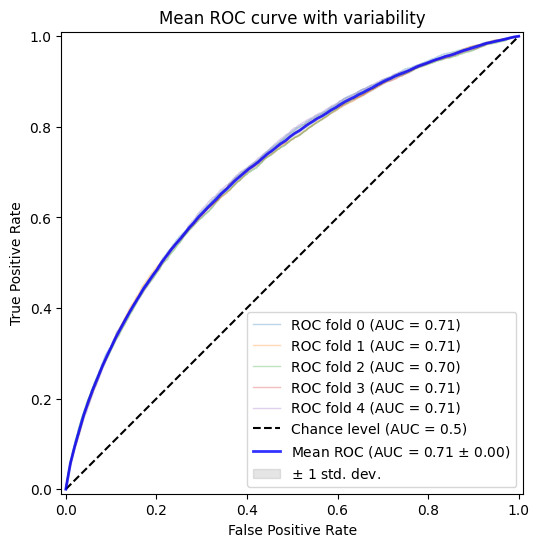

In [15]:
log_reg = roc_auc_plot(train, train_labels, cv=kfold, classifier=log_reg)

In [16]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

# Submission dataframe
submit = test_coll_removed[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.067107
1,100005,0.116815
2,100013,0.055242
3,100028,0.078205
4,100038,0.116298


(array([4.5000e+02, 7.4120e+03, 1.5865e+04, 1.3724e+04, 7.3440e+03,
        2.8110e+03, 8.8600e+02, 2.0300e+02, 4.3000e+01, 6.0000e+00]),
 array([0.02998749, 0.04596552, 0.06194356, 0.07792159, 0.09389962,
        0.10987765, 0.12585569, 0.14183372, 0.15781175, 0.17378978,
        0.18976782]),
 <BarContainer object of 10 artists>)

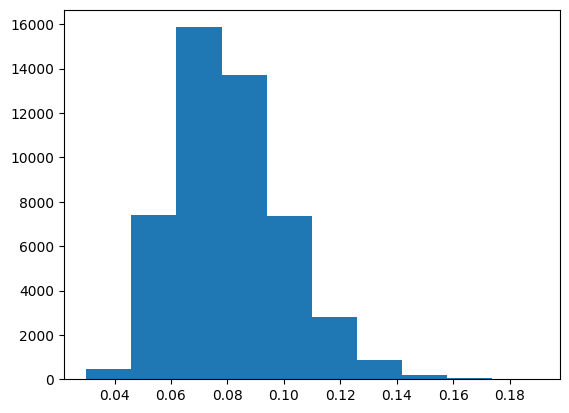

In [17]:
plt.hist(log_reg_pred)

In [18]:
# Save the submission to a csv file
submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/log_reg_data_final.csv', index = False)

In [19]:
sgd_classifier = SGDClassifier(loss='modified_huber', random_state=2024)

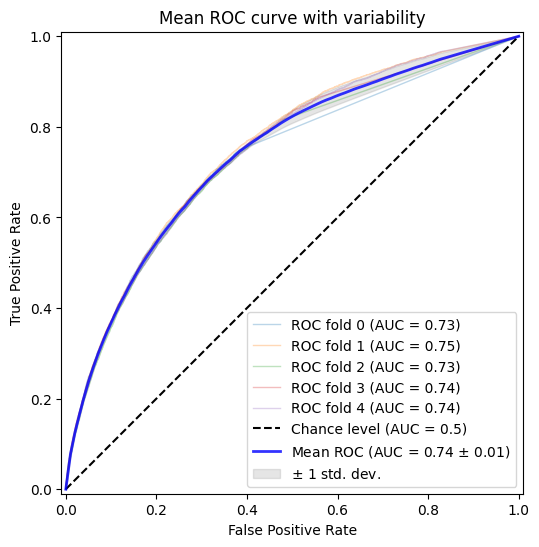

In [20]:
sgd_classifier = roc_auc_plot(train, train_labels, cv=kfold, classifier=sgd_classifier)

In [21]:
# Make predictions on the test data
predictions = sgd_classifier.predict_proba(test)[:, 1]

# Make a submission dataframe
submit = test_coll_removed[['SK_ID_CURR']]
submit['TARGET'] = predictions
print(submit.head())

   SK_ID_CURR    TARGET
0      100001  0.000000
1      100005  0.221357
2      100013  0.061636
3      100028  0.092986
4      100038  0.273369


In [22]:
# Save the submission to a csv file
submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/sgd_data_final.csv', index = False)

In [23]:
lgb = LGBMClassifier(n_estimators=1000, objective = 'binary',
                     class_weight = 'balanced', learning_rate = 0.05,
                     reg_alpha = 0.1, reg_lambda = 0.1,
                     subsample = 0.8, n_jobs = -1, random_state = 50)

[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.206577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30709
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 512
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 19888, number of negative: 226121
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.325580 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30782
[LightGBM] [Info] Number of data points in the train set: 246009, number of used features: 509
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGB

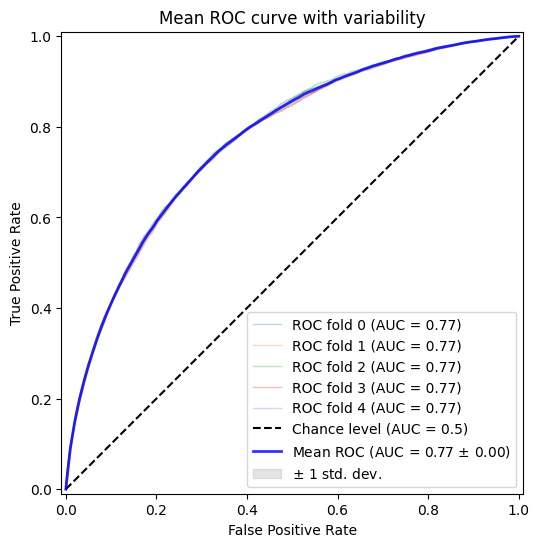

In [24]:
lgb = roc_auc_plot(train, train_labels, cv=kfold, classifier=lgb)

In [26]:
# Make predictions on the test data
predictions = lgb.predict_proba(test)[:, 1]

# Make a submission dataframe
submit = test_coll_removed[['SK_ID_CURR']]
submit['TARGET'] = predictions
print(submit.head())

   SK_ID_CURR    TARGET
0      100001  0.170696
1      100005  0.431899
2      100013  0.041342
3      100028  0.178551
4      100038  0.680210


In [27]:
# Save the submission dataframe
submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/lgb_data_final.csv', index = False)

### Tuning and Result
Belum dapat hasil karena terlalu lama. *Cek metode lain*

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

In [31]:
#List Hyperparameters yang akan diuji
# penalty = ['l1', 'l2']
C = np.logspace(-3, 1, 5)
print(C)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01]


In [30]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(C=C)
#Membuat Object Logistic Regression
logreg = LogisticRegression()
#Memasukan ke Grid Search
#CV itu Cross Validation
#Menggunakan 5-Fold CV
clf = GridSearchCV(logreg, hyperparameters, cv=5)
#Fitting Model
best_model = clf.fit(train,train_labels)
#Nilai hyperparameters terbaik
# print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
#Prediksi menggunakan model baru
y_pred = best_model.predict(test)
y_test = test_coll_removed['TARGET']
#Check performa dari model
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

KeyboardInterrupt: 

In [32]:
#List Hyperparameters yang akan diuji
loss = ['hinge', 'log_loss', 'modified_huber', 'squared_error', 'huber']
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']

In [ ]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(loss=loss, learning_rate=learning_rate)
#Membuat Object Logistic Regression
sgd = SGDClassifier()
#Memasukan ke Grid Search
#CV itu Cross Validation
#Menggunakan 5-Fold CV
clf = GridSearchCV(sgd, hyperparameters, cv=5)
#Fitting Model
best_model = clf.fit(train,train_labels)
#Nilai hyperparameters terbaik
print('Best Loss:', best_model.best_estimator_.get_params()['loss'])
print('Best Learning Rate:', best_model.best_estimator_.get_params()['learning_rate'])
#Prediksi menggunakan model baru
y_pred = best_model.predict(test)
#Check performa dari model
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

# Kesimpulan
1. Pada data akhir (setelah menggabung data application, previous application, dan bureau serta telah melakukan feature engineering dan feature selection), LightGBM menghasilkan score terbaik dengan nilai ROC-AUC sebesar 0.77
2. Logistic Regression mengalami penurunan nilai ROC-AUC pada data akhir, kemungkinan terjadi overfit

# Saran
1. Diperlukan campaign lebih untuk para pensiunan karena umumnya mereka tidak mengalami kesulitan membayar
2. Jadikan pelanggan dengan status pendidikan Higher Education sebagai target utama, karena pelanggan jenis ini umumnya tidak mengalami kesulitan membayar


# Referensi:
1. https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction
2. https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features